# Training Results Analysis: Validation Loss vs Behavioral Alignment

This notebook visualizes the relationship between validation loss and behavioral alignment across different training runs.


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import glob

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'

# Single Epoch Perturbation Sweep

In [3]:
# Set up paths and parameters
#results_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251014_101100')
#results_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251015_092242')
results_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251016_125025')

# Find all training run directories
run_dirs = sorted([d for d in results_dir.glob('training_run*') if d.is_dir()],
                  key=lambda x: int(x.name.split('run')[1]))

print(f"Found {len(run_dirs)} training runs:")
for run_dir in run_dirs:
    print(f"  - {run_dir.name}")


Found 98 training runs:
  - training_run1
  - training_run2
  - training_run3
  - training_run4
  - training_run5
  - training_run6
  - training_run7
  - training_run8
  - training_run9
  - training_run10
  - training_run11
  - training_run12
  - training_run13
  - training_run14
  - training_run15
  - training_run16
  - training_run17
  - training_run18
  - training_run19
  - training_run20
  - training_run21
  - training_run22
  - training_run23
  - training_run24
  - training_run25
  - training_run26
  - training_run27
  - training_run28
  - training_run29
  - training_run30
  - training_run31
  - training_run32
  - training_run33
  - training_run34
  - training_run35
  - training_run36
  - training_run37
  - training_run38
  - training_run39
  - training_run40
  - training_run41
  - training_run42
  - training_run43
  - training_run44
  - training_run45
  - training_run46
  - training_run47
  - training_run48
  - training_run49
  - training_run50
  - training_run51
  - training_run

In [4]:
# Load baseline data
baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior/training_results/training_res_20251013_220330.csv')
baseline_df = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior/training_results/training_res_20251013_220330.csv'

if baseline_csv.exists():
    baseline_df = pd.read_csv(baseline_csv)
    baseline_df_clean = baseline_df #.dropna(subset=['test_loss', 'behavioral_rsa_rho'])
    print(f"Baseline data loaded: {len(baseline_df_clean)} epochs")
else:
    print("Warning: Baseline data not found")

# Load data from all training runs
all_data = {}

for run_dir in run_dirs:
    run_name = run_dir.name
    run_num = run_name.split('run')[1]
    csv_file = run_dir / f"training_res_run{run_num}.csv"
    
    if csv_file.exists():
        df = pd.read_csv(csv_file)
        
        if len(df) > 0:
            all_data[run_name] = df
            print(f"{run_name}: {len(df)} epochs with valid data")
        else:
            print(f"{run_name}: No valid data found (all NaN)")
    else:
        print(f"{run_name}: CSV file not found")

print(f"\nTotal runs with valid data: {len(all_data)}")


Baseline data loaded: 118 epochs
training_run1: 108 epochs with valid data
training_run2: 107 epochs with valid data
training_run3: 94 epochs with valid data
training_run4: 93 epochs with valid data
training_run5: 92 epochs with valid data
training_run6: 91 epochs with valid data
training_run7: 90 epochs with valid data
training_run8: 87 epochs with valid data
training_run9: 86 epochs with valid data
training_run10: 85 epochs with valid data
training_run11: 84 epochs with valid data
training_run12: 83 epochs with valid data
training_run13: 82 epochs with valid data
training_run14: 81 epochs with valid data
training_run15: 80 epochs with valid data
training_run16: 79 epochs with valid data
training_run17: 78 epochs with valid data
training_run18: 77 epochs with valid data
training_run19: 76 epochs with valid data
training_run20: 75 epochs with valid data
training_run21: 74 epochs with valid data
training_run22: 73 epochs with valid data
training_run23: 72 epochs with valid data
training

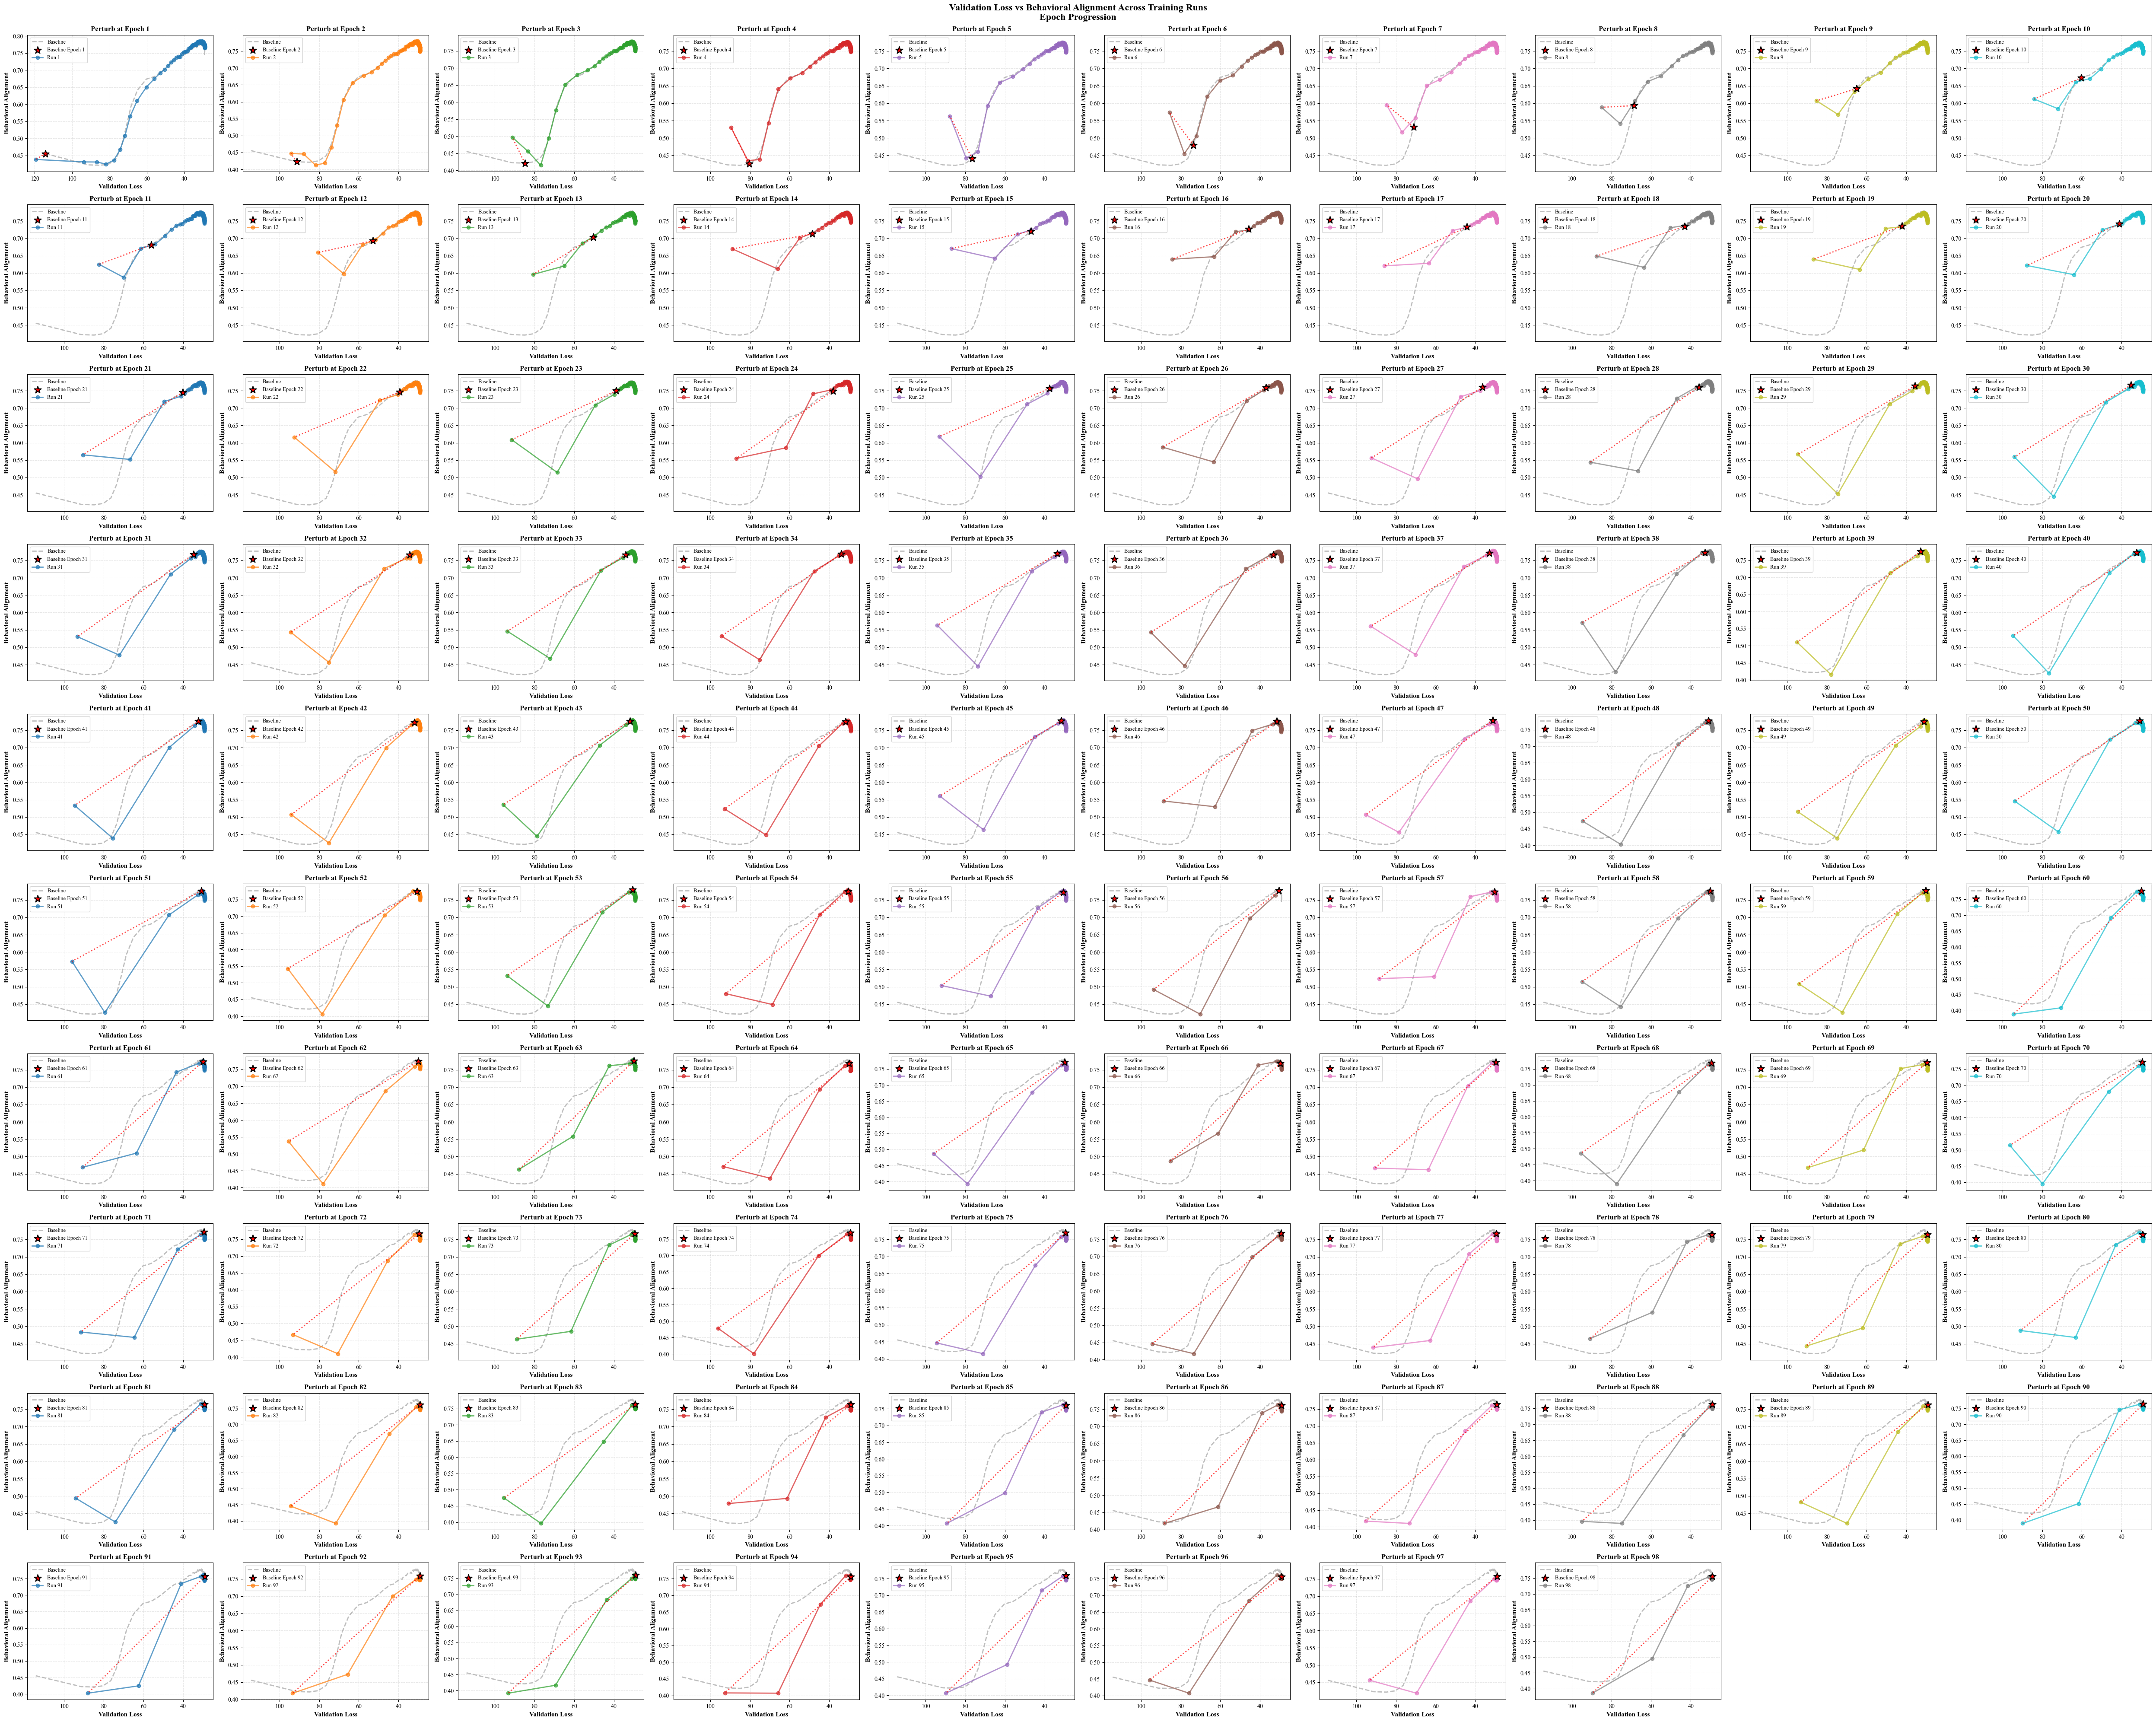

In [15]:
# Create multi-panel figure with separate subplot for each training run
n_runs = len(all_data)

# Determine grid layout (try to make it roughly square)
n_cols = int(np.ceil(np.sqrt(n_runs)))
n_rows = int(np.ceil(n_runs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Flatten axes array for easier indexing
if n_runs > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Use a consistent color scheme
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for idx, (run_name, df) in enumerate(all_data.items()):
    ax = axes[idx]
    
    # Sort by epoch to ensure proper line connection
    df_sorted = df.sort_values('epoch')
    
    # Extract run number for title
    run_num = run_name.split('run')[1]
    perturb_epoch = int(run_num)
    
    # Plot baseline first if available
    baseline_at_perturb = None
    if baseline_df is not None:
        baseline_sorted = baseline_df_clean.sort_values('epoch')
        ax.plot(baseline_sorted['test_loss'], 
                baseline_sorted['behavioral_rsa_rho'],
                linestyle='--',
                linewidth=2,
                color='gray',
                alpha=0.5,
                label='Baseline',
                zorder=1)
        
        # Mark the perturbation epoch on the baseline
        baseline_at_perturb = baseline_df_clean[baseline_df_clean['epoch'] == perturb_epoch]
        if len(baseline_at_perturb) > 0:
            baseline_point = baseline_at_perturb.iloc[0]
            ax.scatter(baseline_point['test_loss'], 
                      baseline_point['behavioral_rsa_rho'],
                      s=150, 
                      color='red', 
                      marker='*',
                      edgecolors='black',
                      linewidth=1.5,
                      zorder=5,
                      label=f'Baseline Epoch {perturb_epoch}')
    
    # Plot perturbation run line with markers
    ax.plot(df_sorted['test_loss'], 
            df_sorted['behavioral_rsa_rho'],
            marker='o',
            markersize=6,
            linewidth=2,
            color=colors[idx % 10],
            alpha=0.7,
            label=f'Run {run_num}',
            zorder=2)
    
    # Connect the perturbation epoch on baseline to the corresponding epoch in perturbation run
    first_epoch = df_sorted.iloc[0]
    last_epoch = df_sorted.iloc[-1]
    
    if baseline_at_perturb is not None and len(baseline_at_perturb) > 0:
        # Draw connection line from baseline to perturbation run
        perturb_run_at_epoch = df_sorted[df_sorted['epoch'] == perturb_epoch]
        if len(perturb_run_at_epoch) > 0:
            perturb_point = perturb_run_at_epoch.iloc[0]
            ax.plot([baseline_point['test_loss'], perturb_point['test_loss']],
                   [baseline_point['behavioral_rsa_rho'], perturb_point['behavioral_rsa_rho']],
                   color='red',
                   linestyle=':',
                   linewidth=2,
                   alpha=0.7,
                   zorder=4)
            
            # # Add annotation showing the divergence
            # mid_x = (baseline_point['test_loss'] + perturb_point['test_loss']) / 2
            # mid_y = (baseline_point['behavioral_rsa_rho'] + perturb_point['behavioral_rsa_rho']) / 2
            # divergence = abs(baseline_point['behavioral_rsa_rho'] - perturb_point['behavioral_rsa_rho'])
            # ax.annotate(f'Δ={divergence:.3f}',
            #            xy=(mid_x, mid_y),
            #            fontsize=8,
            #            color='red',
            #            fontweight='bold',
            #            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='red'))
    
    # ax.annotate(f"Epoch {int(first_epoch['epoch'])}", 
    #             xy=(first_epoch['test_loss'], first_epoch['behavioral_rsa_rho']),
    #             xytext=(10, 10), textcoords='offset points',
    #             fontsize=9, alpha=0.7,
    #             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3),
    #             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', alpha=0.5))
    
    # ax.annotate(f"Epoch {int(last_epoch['epoch'])}", 
    #             xy=(last_epoch['test_loss'], last_epoch['behavioral_rsa_rho']),
    #             xytext=(10, -10), textcoords='offset points',
    #             fontsize=9, alpha=0.7,
    #             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.3),
    #             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', alpha=0.5))
    
    # Formatting
    ax.set_xlabel('Validation Loss', fontsize=11, fontweight='bold')
    ax.set_ylabel('Behavioral Alignment', fontsize=11, fontweight='bold')
    ax.set_title(f'Perturb at Epoch {run_num}', # ({len(df_sorted)} epochs: {int(df_sorted["epoch"].min())}-{int(df_sorted["epoch"].max())})', 
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='best', fontsize=9, framealpha=0.8)
    
    # Flip x-axis so loss goes from high to low
    ax.invert_xaxis()
    
    # # Add summary text
    # summary_text = f"Start: {first_epoch['behavioral_rsa_rho']:.3f}\nEnd: {last_epoch['behavioral_rsa_rho']:.3f}"
    # ax.text(0.02, 0.98, summary_text, transform=ax.transAxes,
    #         fontsize=9, verticalalignment='top',
    #         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Hide any unused subplots
for idx in range(n_runs, len(axes)):
    axes[idx].set_visible(False)

# Add overall title
fig.suptitle('Validation Loss vs Behavioral Alignment Across Training Runs\nEpoch Progression', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()


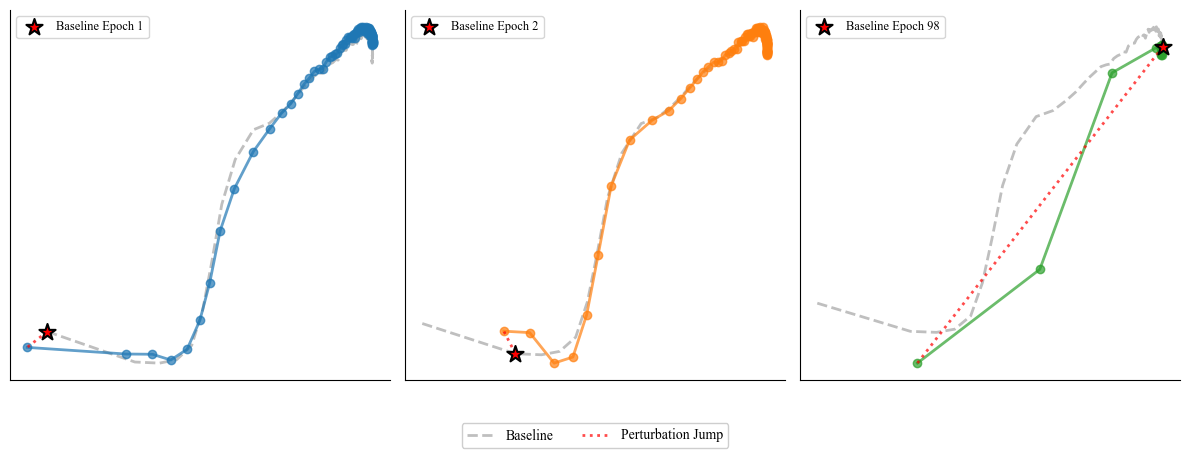

In [7]:
# Only show the first two figures (runs) and the last (epoch 98), in one row.
# Keep both x and y axes for all plots; remove background and the outer square border ("frame").
# Make the figure a bit less wide.
# Remove the grid lines.
# Legend appears only once at the bottom (for Baseline line and Perturbation Jump).
# The baseline epoch star (Baseline Epoch <n>) appears only **in its subplot**'s legend.
# TAKE AWAY ALL AXES TEXT AND LABELS.

run_names = list(all_data.keys())
if len(run_names) < 3:
    runs_to_show = run_names
else:
    runs_to_show = [run_names[0], run_names[1], run_names[-1]]

n_show = len(runs_to_show)
n_cols = n_show
fig_width_per_plot = 4
fig, axes = plt.subplots(1, n_cols, figsize=(fig_width_per_plot * n_cols, 4), squeeze=False)
axes = axes[0]

colors = plt.cm.tab10(np.linspace(0, 1, 10))

# For the figure-level legend at the bottom (only once)
fig_legend_handles = []
fig_legend_labels = []
used_legend_labels = set()

for idx, run_name in enumerate(runs_to_show):
    ax = axes[idx]
    df = all_data[run_name]
    df_sorted = df.sort_values('epoch')
    run_num = run_name.split('run')[1]
    perturb_epoch = int(run_num)

    # Frameless look: remove background and outer spines
    ax.set_facecolor('none')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove axis text and labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

    # Handles for per-axis legend (for the baseline epoch star only)
    ax_legend_handles = []
    ax_legend_labels = []

    # Plot baseline if available
    baseline_at_perturb = None
    baseline_point = None
    if baseline_df is not None:
        baseline_sorted = baseline_df_clean.sort_values('epoch')
        baseline_label = 'Baseline'
        baseline_line, = ax.plot(
            baseline_sorted['test_loss'],
            baseline_sorted['behavioral_rsa_rho'],
            linestyle='--',
            linewidth=2,
            color='gray',
            alpha=0.5,
            label=baseline_label,
            zorder=1
        )
        if baseline_label not in used_legend_labels:
            fig_legend_handles.append(baseline_line)
            fig_legend_labels.append(baseline_label)
            used_legend_labels.add(baseline_label)
        baseline_at_perturb = baseline_df_clean[baseline_df_clean['epoch'] == perturb_epoch]

        # Mark the perturbation epoch on the baseline
        if len(baseline_at_perturb) > 0:
            baseline_point = baseline_at_perturb.iloc[0]
            star_label = f'Baseline Epoch {perturb_epoch}'
            baseline_scatter = ax.scatter(
                baseline_point['test_loss'],
                baseline_point['behavioral_rsa_rho'],
                s=150,
                color='red',
                marker='*',
                edgecolors='black',
                linewidth=1.5,
                zorder=5,
                label=star_label
            )
            ax_legend_handles.append(baseline_scatter)
            ax_legend_labels.append(star_label)

    # Plot perturbation run line with markers (NO legend entry)
    ax.plot(df_sorted['test_loss'],
            df_sorted['behavioral_rsa_rho'],
            marker='o',
            markersize=6,
            linewidth=2,
            color=colors[idx % 10],
            alpha=0.7,
            label=None,
            zorder=2)

    # Connect the perturbation epoch on baseline to the corresponding epoch in perturbation run
    first_epoch = df_sorted.iloc[0]
    last_epoch = df_sorted.iloc[-1]

    if baseline_at_perturb is not None and len(baseline_at_perturb) > 0:
        perturb_run_at_epoch = df_sorted[df_sorted['epoch'] == perturb_epoch]
        if len(perturb_run_at_epoch) > 0:
            perturb_point = perturb_run_at_epoch.iloc[0]
            jump_label = 'Perturbation Jump'
            connect_line, = ax.plot(
                [baseline_point['test_loss'], perturb_point['test_loss']],
                [baseline_point['behavioral_rsa_rho'], perturb_point['behavioral_rsa_rho']],
                color='red',
                linestyle=':',
                linewidth=2,
                alpha=0.7,
                zorder=4,
                label=jump_label if jump_label not in used_legend_labels else None
            )
            if jump_label not in used_legend_labels:
                fig_legend_handles.append(connect_line)
                fig_legend_labels.append(jump_label)
                used_legend_labels.add(jump_label)

    # Per-plot legend: only for the star if present
    if ax_legend_handles and ax_legend_labels:
        ax.legend(
            handles=ax_legend_handles,
            labels=ax_legend_labels,
            loc='upper left',
            fontsize=9, framealpha=0.8
        )
    else:
        ax.legend().set_visible(False)  # No legend if no star

    # Flip x-axis so loss goes from high to low
    ax.invert_xaxis()
    # Remove grid lines
    ax.grid(False)

# Hide any unused subplots
for idx in range(n_show, len(axes)):
    axes[idx].set_visible(False)

# Add single legend for all plots at the bottom (only for baseline/jump handles)
if fig_legend_handles and fig_legend_labels:
    fig.legend(
        fig_legend_handles,
        fig_legend_labels,
        loc='lower center',
        ncol=min(len(fig_legend_handles), 5),
        fontsize=10,
        bbox_to_anchor=(0.5, -0.15),
        framealpha=0.95
    )

plt.tight_layout()
plt.show()

In [8]:
# Print summary statistics for all runs
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60 + "\n")

# Print baseline statistics first
if baseline_df is not None:
    baseline_sorted = baseline_df_clean.sort_values('epoch')
    print("BASELINE (No Perturbations):")
    print(f"  Epochs: {baseline_df_clean['epoch'].min():.0f} - {baseline_df_clean['epoch'].max():.0f} ({len(baseline_df_clean)} total)")
    print(f"  Validation Loss:")
    print(f"    Range: {baseline_df_clean['test_loss'].min():.2f} - {baseline_df_clean['test_loss'].max():.2f}")
    print(f"    Initial: {baseline_sorted.iloc[0]['test_loss']:.2f}")
    print(f"    Final: {baseline_sorted.iloc[-1]['test_loss']:.2f}")
    print(f"  Behavioral Alignment:")
    print(f"    Range: {baseline_df_clean['behavioral_rsa_rho'].min():.4f} - {baseline_df_clean['behavioral_rsa_rho'].max():.4f}")
    print(f"    Initial: {baseline_sorted.iloc[0]['behavioral_rsa_rho']:.4f}")
    print(f"    Final: {baseline_sorted.iloc[-1]['behavioral_rsa_rho']:.4f}")
    print(f"    Change: {(baseline_sorted.iloc[-1]['behavioral_rsa_rho'] - baseline_sorted.iloc[0]['behavioral_rsa_rho']):.4f}")
    print("\n" + "-"*60 + "\n")

for run_name, df in all_data.items():
    run_num = run_name.split('run')[1]
    df_sorted = df.sort_values('epoch')
    
    print(f"Training Run {run_num} (Perturbed at epoch {run_num}):")
    print(f"  Epochs: {df['epoch'].min():.0f} - {df['epoch'].max():.0f} ({len(df)} total)")
    print(f"  Validation Loss:")
    print(f"    Range: {df['test_loss'].min():.2f} - {df['test_loss'].max():.2f}")
    print(f"    Final: {df_sorted.iloc[-1]['test_loss']:.2f}")
    print(f"  Behavioral Alignment:")
    print(f"    Range: {df['behavioral_rsa_rho'].min():.4f} - {df['behavioral_rsa_rho'].max():.4f}")
    print(f"    Initial: {df_sorted.iloc[0]['behavioral_rsa_rho']:.4f}")
    print(f"    Final: {df_sorted.iloc[-1]['behavioral_rsa_rho']:.4f}")
    print(f"    Change: {(df_sorted.iloc[-1]['behavioral_rsa_rho'] - df_sorted.iloc[0]['behavioral_rsa_rho']):.4f}")
    
    # Compare to baseline at same epoch if available
    if baseline_df is not None:
        perturb_epoch = int(run_num)
        baseline_at_perturb = baseline_df_clean[baseline_df_clean['epoch'] == perturb_epoch]
        if len(baseline_at_perturb) > 0:
            baseline_ba = baseline_at_perturb.iloc[0]['behavioral_rsa_rho']
            final_ba = df_sorted.iloc[-1]['behavioral_rsa_rho']
            print(f"  Comparison to baseline at perturbation epoch {perturb_epoch}:")
            print(f"    Baseline BA: {baseline_ba:.4f}")
            print(f"    Final BA after recovery: {final_ba:.4f}")
            print(f"    Difference: {(final_ba - baseline_ba):.4f}")
    print()



SUMMARY STATISTICS

BASELINE (No Perturbations):
  Epochs: 1 - 118 (118 total)
  Validation Loss:
    Range: 29.10 - 114.27
    Initial: 114.27
    Final: 29.31
  Behavioral Alignment:
    Range: 0.4213 - 0.7790
    Initial: 0.4554
    Final: 0.7475
    Change: 0.2921

------------------------------------------------------------

Training Run 1 (Perturbed at epoch 1):
  Epochs: 1 - 108 (108 total)
  Validation Loss:
    Range: 29.10 - 119.47
    Final: 29.18
  Behavioral Alignment:
    Range: 0.4246 - 0.7853
    Initial: 0.4383
    Final: 0.7677
    Change: 0.3294
  Comparison to baseline at perturbation epoch 1:
    Baseline BA: 0.4554
    Final BA after recovery: 0.7677
    Difference: 0.3123

Training Run 2 (Perturbed at epoch 2):
  Epochs: 2 - 108 (107 total)
  Validation Loss:
    Range: 29.17 - 94.16
    Final: 29.27
  Behavioral Alignment:
    Range: 0.4122 - 0.7796
    Initial: 0.4471
    Final: 0.7494
    Change: 0.3024
  Comparison to baseline at perturbation epoch 2:
    Ba


Creating Behavioral Alignment Heatmap

Epoch range: 1 - 118
Training runs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
Total runs: 98



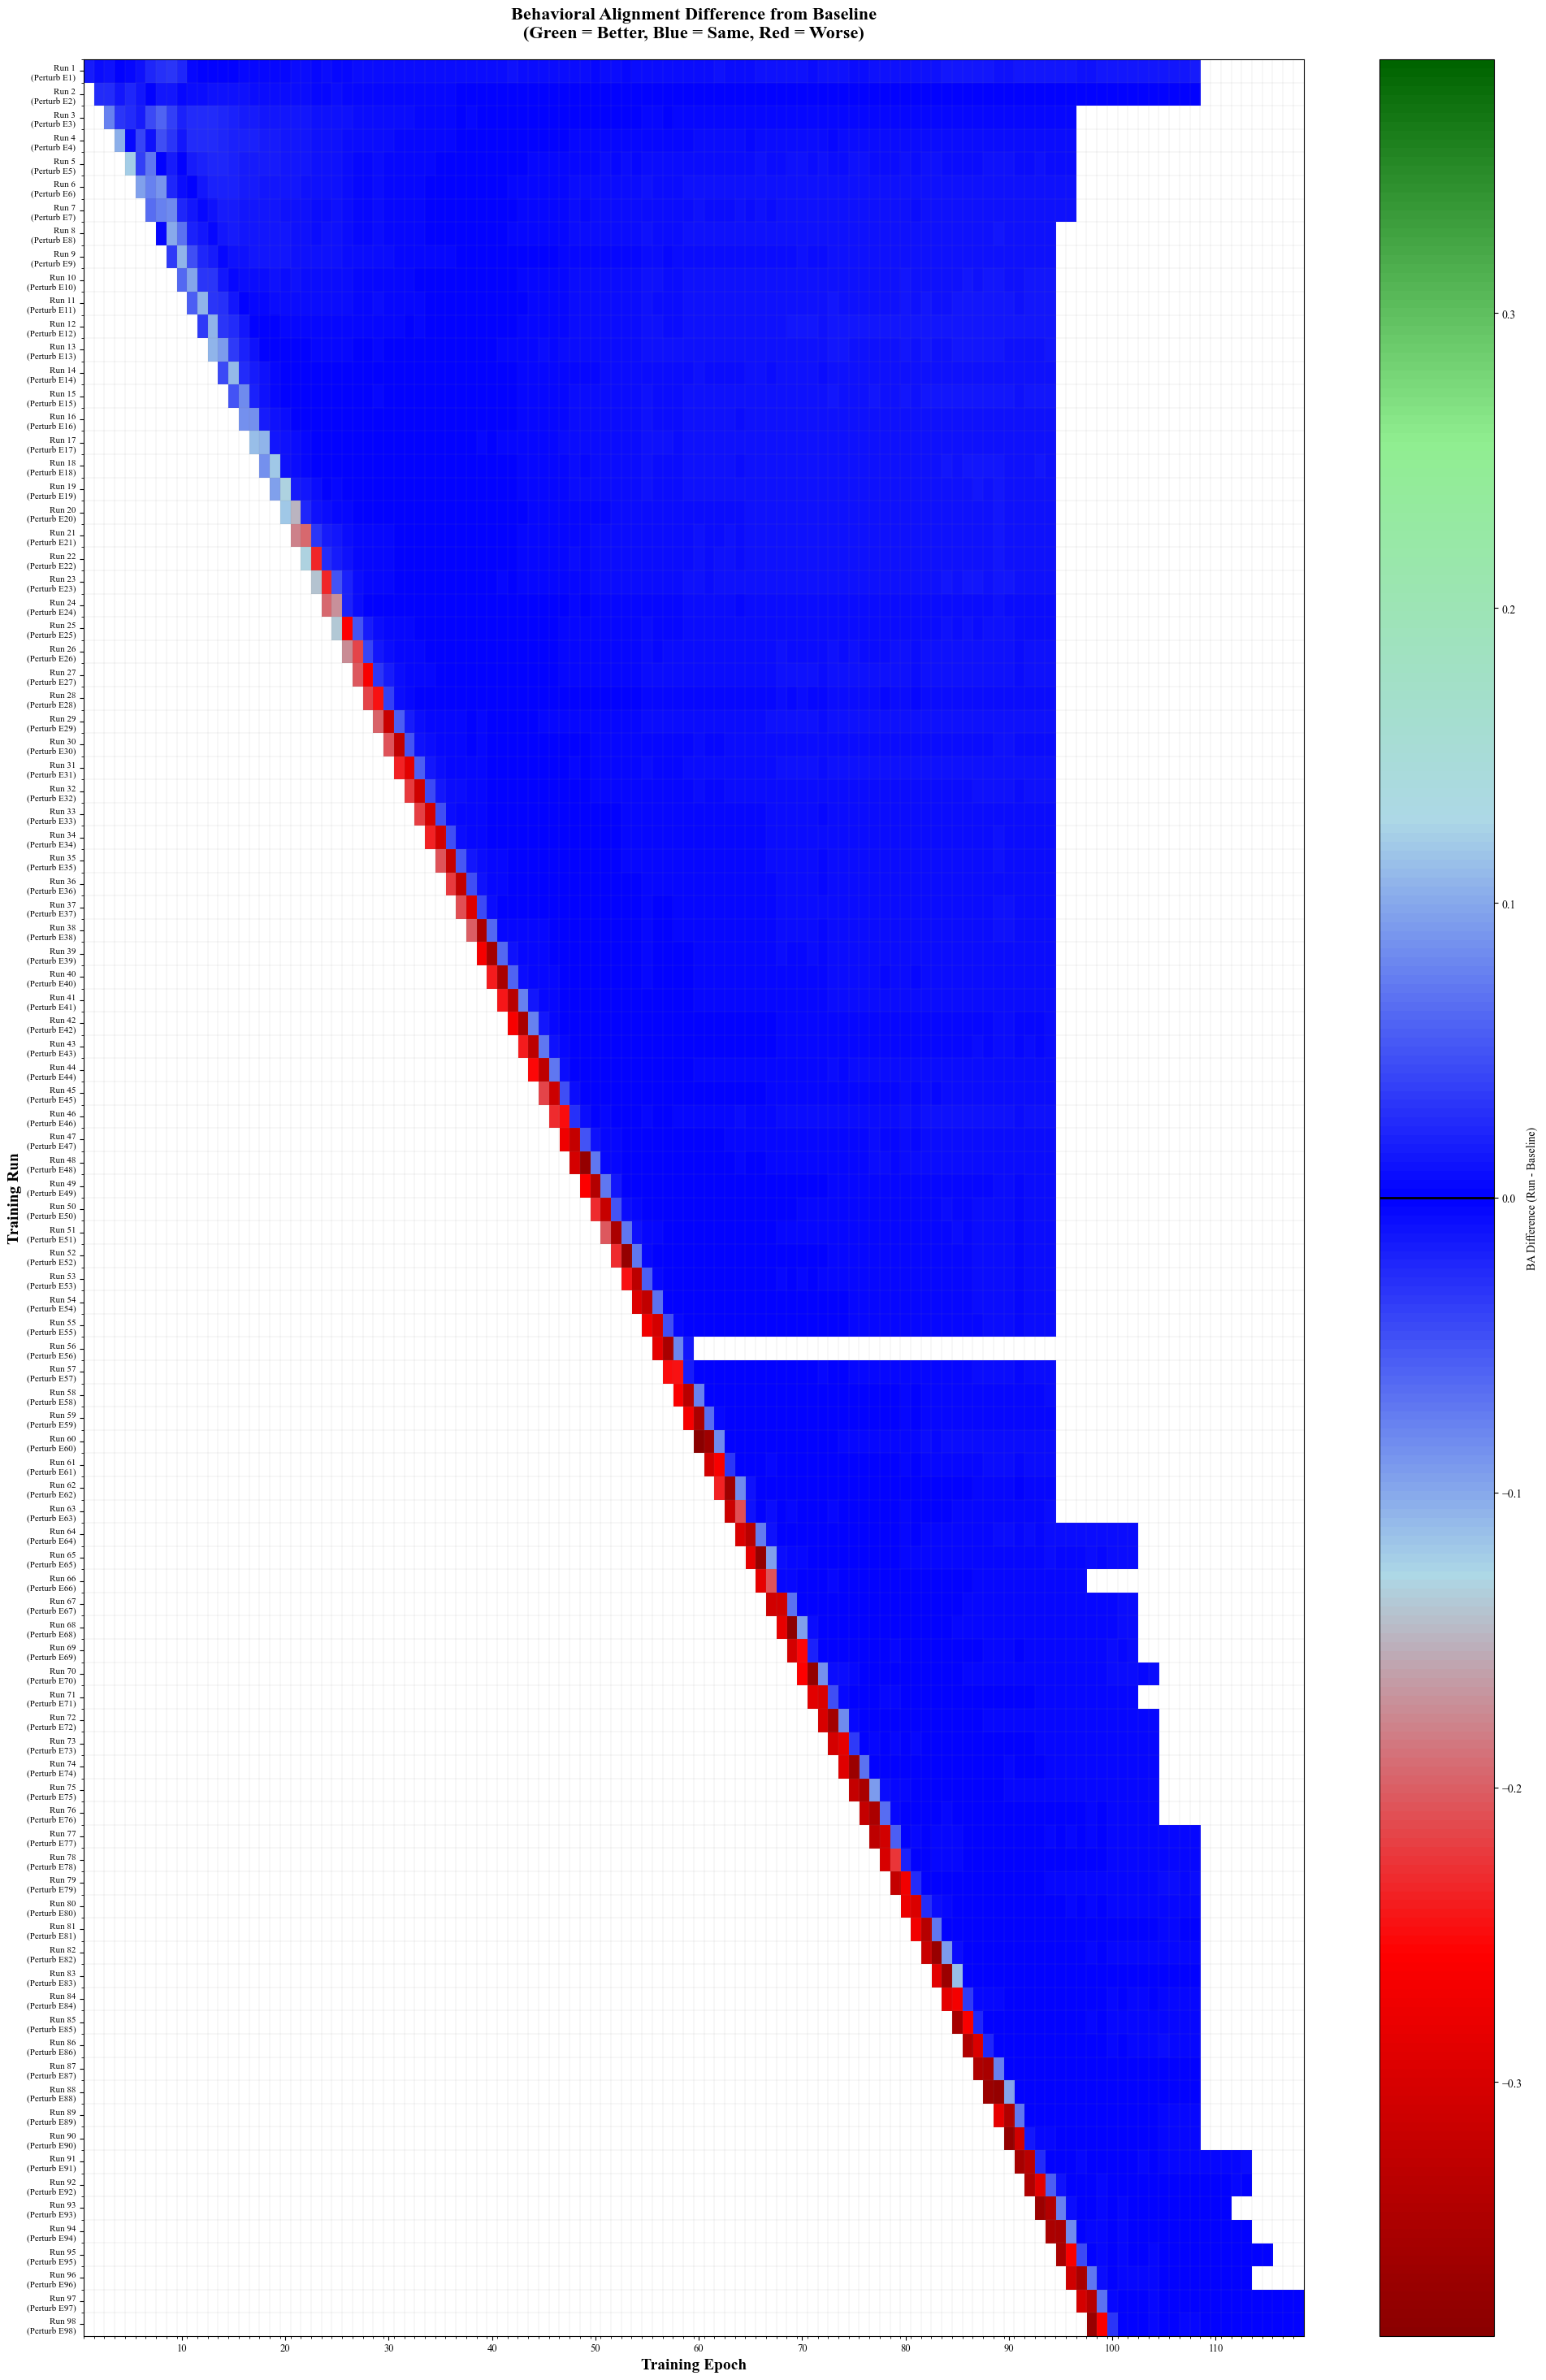


Heatmap Statistics:
  Max positive difference (better than baseline): 0.1224
  Max negative difference (worse than baseline): -0.3861
  Mean absolute difference: 0.0162
  Percentage of cells with data: 42.6%


In [9]:
# Heatmap: Behavioral Alignment Difference from Baseline across Epochs and Training Runs
print("\n" + "="*60)
print("Creating Behavioral Alignment Heatmap")
print("="*60 + "\n")

# Determine the range of epochs across all runs
all_epochs = set()
run_numbers = []

for run_name in all_data.keys():
    run_num = int(run_name.split('run')[1])
    run_numbers.append(run_num)
    all_epochs.update(all_data[run_name]['epoch'].values)

# Add baseline epochs
if baseline_df is not None:
    all_epochs.update(baseline_df_clean['epoch'].values)

min_epoch = int(min(all_epochs))
max_epoch = int(max(all_epochs))
epoch_range = list(range(min_epoch, max_epoch + 1))

print(f"Epoch range: {min_epoch} - {max_epoch}")
print(f"Training runs: {sorted(run_numbers)}")
print(f"Total runs: {len(run_numbers)}\n")

# Create a matrix: rows = training runs, columns = epochs
# Values = difference from baseline BA (positive = better than baseline, negative = worse)
run_numbers_sorted = sorted(run_numbers)
heatmap_data = np.full((len(run_numbers_sorted), len(epoch_range)), np.nan)

# Fill in the heatmap data
for i, run_num in enumerate(run_numbers_sorted):
    run_name = f"training_run{run_num}"
    if run_name in all_data:
        df = all_data[run_name]
        for _, row in df.iterrows():
            epoch = int(row['epoch'])
            if epoch in epoch_range:
                epoch_idx = epoch_range.index(epoch)
                
                # Get baseline BA at this epoch
                if baseline_df is not None:
                    baseline_at_epoch = baseline_df_clean[baseline_df_clean['epoch'] == epoch]
                    if len(baseline_at_epoch) > 0:
                        baseline_ba = baseline_at_epoch.iloc[0]['behavioral_rsa_rho']
                        run_ba = row['behavioral_rsa_rho']
                        
                        # Calculate difference (run - baseline)
                        heatmap_data[i, epoch_idx] = run_ba - baseline_ba

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, max(8, len(run_numbers_sorted) * 0.3)))

# Create a custom colormap with a narrow blue region at zero
# This makes deviations from baseline more apparent
from matplotlib.colors import LinearSegmentedColormap
colors_positions = [
    (0.0, 'darkred'),      # Minimum (worst)
    (0.45, 'red'),         # Approaching zero from below
    (0.48, 'lightblue'),   # Just below zero
    (0.50, 'blue'),        # Exactly zero (baseline)
    (0.52, 'lightblue'),   # Just above zero
    (0.55, 'lightgreen'),  # Approaching from above
    (1.0, 'darkgreen')     # Maximum (best)
]
n_bins = 256
cmap = LinearSegmentedColormap.from_list('custom_narrow_diverging', 
                                         [c for _, c in colors_positions], 
                                         N=n_bins)

# Use a diverging colormap centered at 0
# Positive (green) = better than baseline, Negative (red) = worse than baseline, Zero (blue) = same as baseline
vmax = max(abs(np.nanmin(heatmap_data)), abs(np.nanmax(heatmap_data))) if not np.all(np.isnan(heatmap_data)) else 0.1
im = ax.imshow(heatmap_data, cmap=cmap, aspect='auto', vmin=-vmax, vmax=vmax, interpolation='nearest')

# Set ticks and labels
ax.set_yticks(range(len(run_numbers_sorted)))
ax.set_yticklabels([f'Run {r}\n(Perturb E{r})' for r in run_numbers_sorted], fontsize=8)

# Show every 5th or 10th epoch on x-axis depending on range
epoch_tick_interval = 5 if len(epoch_range) <= 100 else 10
epoch_ticks = [i for i, e in enumerate(epoch_range) if e % epoch_tick_interval == 0]
epoch_labels = [epoch_range[i] for i in epoch_ticks]
ax.set_xticks(epoch_ticks)
ax.set_xticklabels(epoch_labels, fontsize=9)

# Labels and title
ax.set_xlabel('Training Epoch', fontsize=14, fontweight='bold')
ax.set_ylabel('Training Run', fontsize=14, fontweight='bold')
ax.set_title('Behavioral Alignment Difference from Baseline\n(Green = Better, Blue = Same, Red = Worse)', 
             fontsize=16, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='BA Difference (Run - Baseline)')
cbar.ax.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Add grid
ax.set_xticks(np.arange(len(epoch_range)) - 0.5, minor=True)
ax.set_yticks(np.arange(len(run_numbers_sorted)) - 0.5, minor=True)
ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.3, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print("\nHeatmap Statistics:")
print(f"  Max positive difference (better than baseline): {np.nanmax(heatmap_data):.4f}")
print(f"  Max negative difference (worse than baseline): {np.nanmin(heatmap_data):.4f}")
print(f"  Mean absolute difference: {np.nanmean(np.abs(heatmap_data)):.4f}")
print(f"  Percentage of cells with data: {100 * np.sum(~np.isnan(heatmap_data)) / heatmap_data.size:.1f}%")


In [16]:
print(all_data)

{'training_run1':      epoch  train_loss   test_loss  behavioral_rsa_rho  \
0        1  160.298692  119.468458            0.438297   
1        2  102.287952   93.693272            0.431129   
2        3   90.141703   86.723726            0.430863   
3        4   84.487546   81.930146            0.424633   
4        5   79.922106   77.654144            0.436279   
..     ...         ...         ...                 ...   
103    104   16.647716   29.158457            0.766170   
104    105   16.560730   29.191145            0.765508   
105    106   16.464983   29.195586            0.767839   
106    107   16.359065   29.175739            0.769266   
107    108   16.262598   29.184202            0.767719   

     behavioral_rsa_p_value  used_random_targets  used_shuffled_targets  
0              3.748281e-54                 True                  False  
1              2.882984e-52                False                  False  
2              3.379803e-52                False               

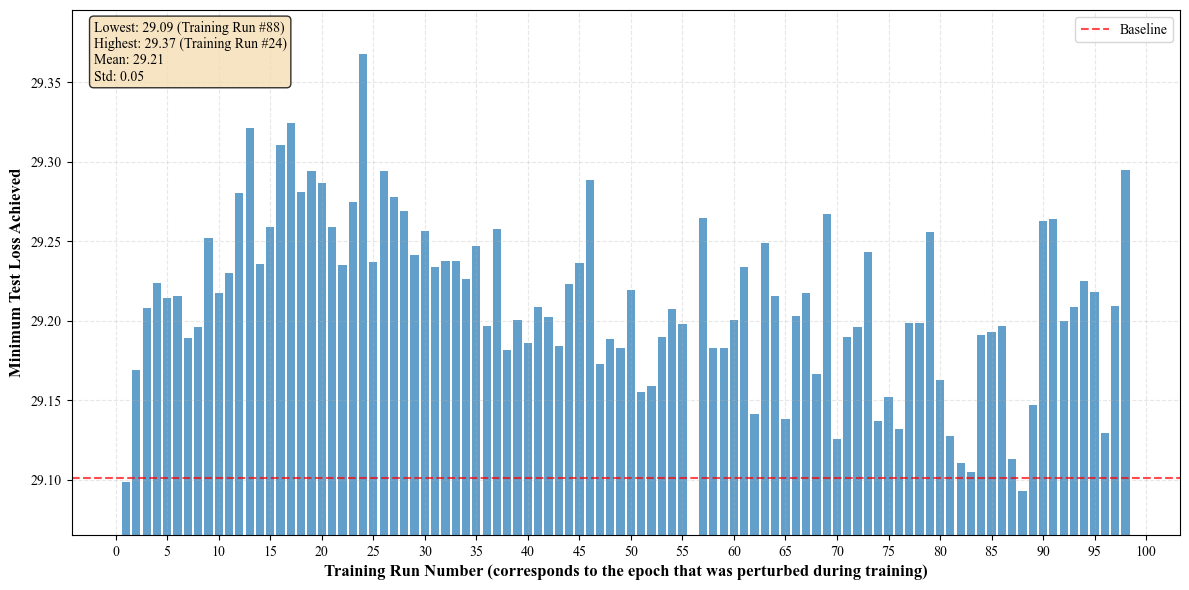


Minimum test loss statistics:
  Overall minimum: 29.09
  Overall maximum: 29.37
  Mean: 29.21
  Standard deviation: 0.05
  Range: 0.28


In [17]:
# Plot the minimum test loss for each run
min_test_losses = []
run_numbers = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    # Skip run 56 since it failed
    if run_num == 56:
        continue
    min_loss = df['test_loss'].min()
    min_test_losses.append(min_loss)
    run_numbers.append(run_num)

# Sort by run number for proper ordering
sorted_data = sorted(zip(run_numbers, min_test_losses))
run_numbers_sorted, min_test_losses_sorted = zip(*sorted_data)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(run_numbers_sorted, min_test_losses_sorted, alpha=0.7)
plt.xlabel('Training Run Number (corresponds to the epoch that was perturbed during training)', fontsize=12, fontweight='bold')
plt.ylabel('Minimum Test Loss Achieved', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(range(0, 101, 5))

# Add some statistics
min_loss_overall = min(min_test_losses_sorted)
max_loss_overall = max(min_test_losses_sorted)
mean_loss = np.mean(min_test_losses_sorted)
baseline_loss = min(baseline_df_clean['test_loss'])
min_loss_run_num = run_numbers_sorted[min_test_losses_sorted.index(min_loss_overall)]
max_loss_run_num = run_numbers_sorted[min_test_losses_sorted.index(max_loss_overall)]

# Zoom in on the data by setting y-axis limits
y_range = max_loss_overall - min_loss_overall
y_margin = y_range * 0.1  # 10% margin
plt.ylim(min_loss_overall - y_margin, max_loss_overall + y_margin)

# Add the red dashed line for baseline (mean)
baseline_loss = plt.axhline(y=baseline_loss, color='red', linestyle='--', alpha=0.7, label='Baseline')

# Add legend including baseline description
plt.legend()

# Add text box with statistics
stats_text = f'Lowest: {min_loss_overall:.2f} (Training Run #{min_loss_run_num})\nHighest: {max_loss_overall:.2f} (Training Run #{max_loss_run_num})\nMean: {mean_loss:.2f}\nStd: {np.std(min_test_losses_sorted):.2f}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nMinimum test loss statistics:")
print(f"  Overall minimum: {min_loss_overall:.2f}")
print(f"  Overall maximum: {max_loss_overall:.2f}")
print(f"  Mean: {mean_loss:.2f}")
print(f"  Standard deviation: {np.std(min_test_losses_sorted):.2f}")
print(f"  Range: {max_loss_overall - min_loss_overall:.2f}")

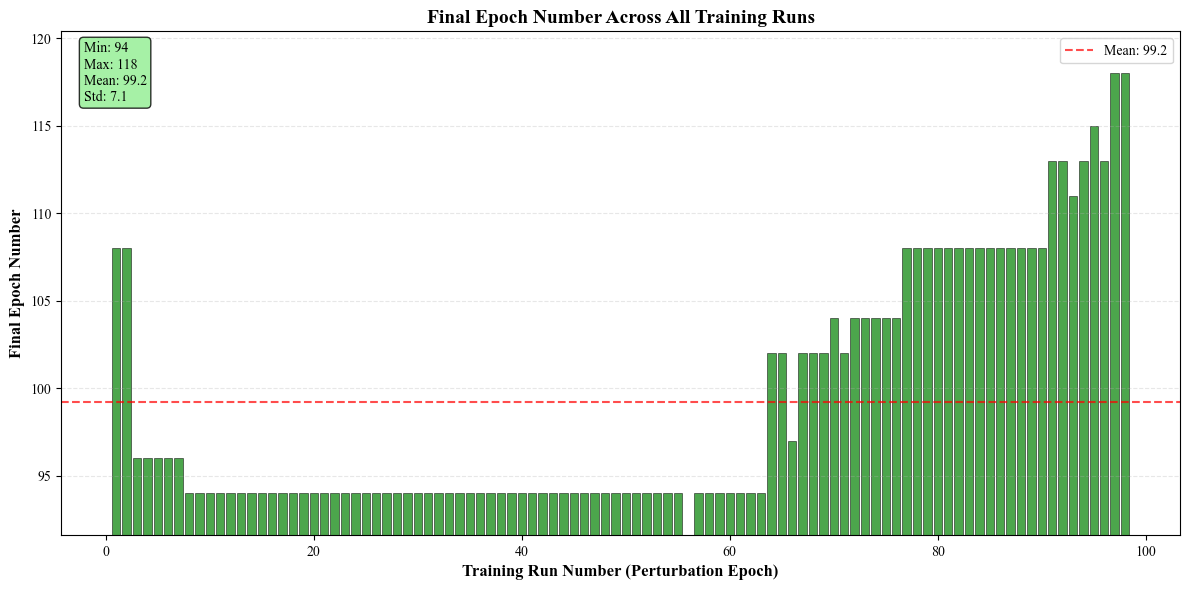


Final epoch statistics:
  Overall minimum: 94
  Overall maximum: 118
  Mean: 99.2
  Standard deviation: 7.1
  Range: 24


In [18]:
# Plot the final epoch number for each training run
final_epochs = []
run_numbers_final = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    # Skip run 56 since it failed
    if run_num == 56:
        continue
    final_epoch = df['epoch'].max()
    final_epochs.append(final_epoch)
    run_numbers_final.append(run_num)

# Sort by run number for proper ordering
sorted_data_final = sorted(zip(run_numbers_final, final_epochs))
run_numbers_final_sorted, final_epochs_sorted = zip(*sorted_data_final)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(run_numbers_final_sorted, final_epochs_sorted, alpha=0.7, color='green', edgecolor='black', linewidth=0.5)
plt.xlabel('Training Run Number (Perturbation Epoch)', fontsize=12, fontweight='bold')
plt.ylabel('Final Epoch Number', fontsize=12, fontweight='bold')
plt.title('Final Epoch Number Across All Training Runs', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add some statistics
min_final_overall = min(final_epochs_sorted)
max_final_overall = max(final_epochs_sorted)
mean_final = np.mean(final_epochs_sorted)

# Zoom in on the data by setting y-axis limits
y_range_final = max_final_overall - min_final_overall
y_margin_final = y_range_final * 0.1  # 10% margin
plt.ylim(min_final_overall - y_margin_final, max_final_overall + y_margin_final)

plt.axhline(y=mean_final, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_final:.1f}')
plt.legend()

# Add text box with statistics
stats_text_final = f'Min: {min_final_overall}\nMax: {max_final_overall}\nMean: {mean_final:.1f}\nStd: {np.std(final_epochs_sorted):.1f}'
plt.text(0.02, 0.98, stats_text_final, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nFinal epoch statistics:")
print(f"  Overall minimum: {min_final_overall}")
print(f"  Overall maximum: {max_final_overall}")
print(f"  Mean: {mean_final:.1f}")
print(f"  Standard deviation: {np.std(final_epochs_sorted):.1f}")
print(f"  Range: {max_final_overall - min_final_overall}")


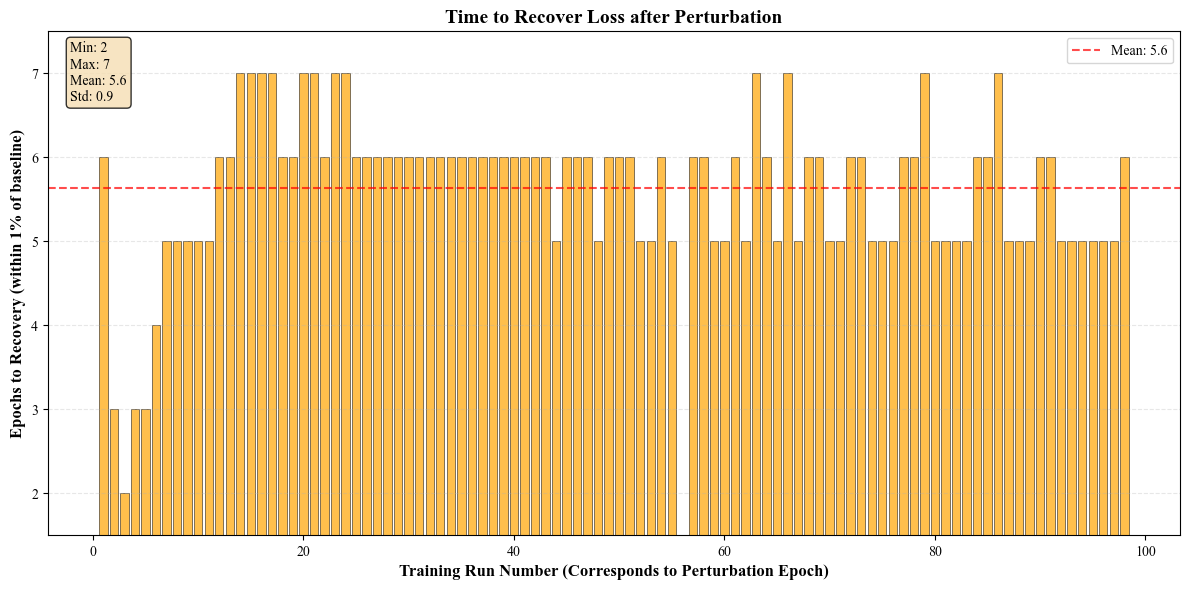


Recovery time statistics (epochs to within 1% of baseline):
  Overall minimum: 2
  Overall maximum: 7
  Mean: 5.6
  Standard deviation: 0.9
  Range: 5

Recovery examples:
  Run 1: 6 epochs to recovery
  Run 2: 3 epochs to recovery
  Run 3: 2 epochs to recovery
  Run 4: 3 epochs to recovery
  Run 5: 3 epochs to recovery


In [19]:
# Plot how many epochs it takes each run to return within 1% of baseline loss
recovery_epochs = []
run_numbers_recovery = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    # Skip run 56 since it failed
    if run_num == 56:
        continue
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    perturb_epoch = int(run_num)
    
    # Find the first epoch where test_loss is within % of baseline at the same epoch
    recovery_epoch = None
    
    for _, row in df_sorted.iterrows():
        current_epoch = int(row['epoch'])
        
        # Get baseline loss at the same epoch
        baseline_at_same_epoch = baseline_df_clean[baseline_df_clean['epoch'] == current_epoch]
        
        if len(baseline_at_same_epoch) > 0:
            baseline_loss = baseline_at_same_epoch.iloc[0]['test_loss']
            target_loss = baseline_loss * 1.01  # Within % of baseline at same epoch
            
            if row['test_loss'] <= target_loss:
                recovery_epoch = current_epoch
                break
    
    if recovery_epoch is not None:
        # Calculate epochs from perturbation to recovery
        epochs_to_recovery = recovery_epoch - perturb_epoch
        recovery_epochs.append(epochs_to_recovery)
        run_numbers_recovery.append(run_num)
    else:
        # If never recovered, use the total epochs trained
        epochs_trained = len(df_sorted)
        recovery_epochs.append(epochs_trained)
        run_numbers_recovery.append(run_num)

# Sort by run number for proper ordering
sorted_data_recovery = sorted(zip(run_numbers_recovery, recovery_epochs))
run_numbers_recovery_sorted, recovery_epochs_sorted = zip(*sorted_data_recovery)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(run_numbers_recovery_sorted, recovery_epochs_sorted, alpha=0.7, color='orange', edgecolor='black', linewidth=0.5)
plt.xlabel('Training Run Number (Corresponds to Perturbation Epoch)', fontsize=12, fontweight='bold')
plt.ylabel('Epochs to Recovery (within 1% of baseline)', fontsize=12, fontweight='bold')
plt.title('Time to Recover Loss after Perturbation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add some statistics
min_recovery_overall = min(recovery_epochs_sorted)
max_recovery_overall = max(recovery_epochs_sorted)
mean_recovery = np.mean(recovery_epochs_sorted)

# Zoom in on the data by setting y-axis limits
y_range_recovery = max_recovery_overall - min_recovery_overall
y_margin_recovery = y_range_recovery * 0.1  # 10% margin
plt.ylim(min_recovery_overall - y_margin_recovery, max_recovery_overall + y_margin_recovery)

plt.axhline(y=mean_recovery, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_recovery:.1f}')
plt.legend()

# Add text box with statistics
stats_text_recovery = f'Min: {min_recovery_overall}\nMax: {max_recovery_overall}\nMean: {mean_recovery:.1f}\nStd: {np.std(recovery_epochs_sorted):.1f}'
plt.text(0.02, 0.98, stats_text_recovery, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nRecovery time statistics (epochs to within 1% of baseline):")
print(f"  Overall minimum: {min_recovery_overall}")
print(f"  Overall maximum: {max_recovery_overall}")
print(f"  Mean: {mean_recovery:.1f}")
print(f"  Standard deviation: {np.std(recovery_epochs_sorted):.1f}")
print(f"  Range: {max_recovery_overall - min_recovery_overall}")

# Print some examples for verification
print(f"\nRecovery examples:")
for i in range(min(5, len(run_numbers_recovery_sorted))):
    run_num = run_numbers_recovery_sorted[i]
    recovery_time = recovery_epochs_sorted[i]
    print(f"  Run {run_num}: {recovery_time} epochs to recovery")


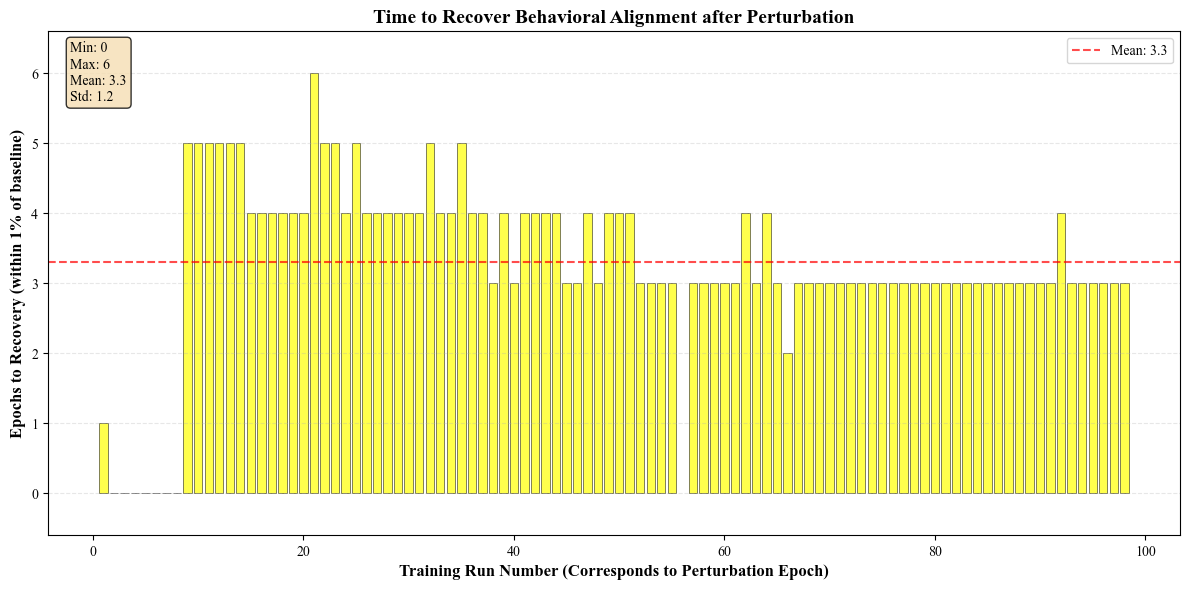


Behavioral alignment recovery time statistics (epochs to within 1% of baseline):
  Overall minimum: 0
  Overall maximum: 6
  Mean: 3.3
  Standard deviation: 1.2
  Range: 6

Behavioral alignment recovery examples:
  Run 1: 1 epochs to recovery
  Run 2: 0 epochs to recovery
  Run 3: 0 epochs to recovery
  Run 4: 0 epochs to recovery
  Run 5: 0 epochs to recovery


In [20]:
# Plot how many epochs it takes each run to return within 1% of baseline behavioral alignment
recovery_epochs_ba = []
run_numbers_recovery_ba = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    # Skip run 56 since it failed
    if run_num == 56:
        continue
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    perturb_epoch = int(run_num)
    
    # Find the first epoch where behavioral_rsa_rho is within 1% of baseline at the same epoch
    recovery_epoch = None
    
    for _, row in df_sorted.iterrows():
        current_epoch = int(row['epoch'])
        
        # Get baseline behavioral alignment at the same epoch
        baseline_at_same_epoch = baseline_df_clean[baseline_df_clean['epoch'] == current_epoch]
        
        if len(baseline_at_same_epoch) > 0:
            baseline_ba = baseline_at_same_epoch.iloc[0]['behavioral_rsa_rho']
            # For behavioral alignment, we want to be within 1% of baseline
            # Since higher is better, we check if run_ba >= baseline_ba * 0.99
            target_ba = baseline_ba * 0.99  # Within 1% of baseline (1% lower)
            
            if row['behavioral_rsa_rho'] >= target_ba:
                recovery_epoch = current_epoch
                break
    
    if recovery_epoch is not None:
        # Calculate epochs from perturbation to recovery
        epochs_to_recovery = recovery_epoch - perturb_epoch
        recovery_epochs_ba.append(epochs_to_recovery)
        run_numbers_recovery_ba.append(run_num)
    else:
        # If never recovered, use the total epochs trained
        epochs_trained = len(df_sorted)
        recovery_epochs_ba.append(epochs_trained)
        run_numbers_recovery_ba.append(run_num)

# Sort by run number for proper ordering
sorted_data_recovery_ba = sorted(zip(run_numbers_recovery_ba, recovery_epochs_ba))
run_numbers_recovery_ba_sorted, recovery_epochs_ba_sorted = zip(*sorted_data_recovery_ba)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(run_numbers_recovery_ba_sorted, recovery_epochs_ba_sorted, alpha=0.7, color='yellow', edgecolor='black', linewidth=0.5)
plt.xlabel('Training Run Number (Corresponds to Perturbation Epoch)', fontsize=12, fontweight='bold')
plt.ylabel('Epochs to Recovery (within 1% of baseline)', fontsize=12, fontweight='bold')
plt.title('Time to Recover Behavioral Alignment after Perturbation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add some statistics
min_recovery_ba_overall = min(recovery_epochs_ba_sorted)
max_recovery_ba_overall = max(recovery_epochs_ba_sorted)
mean_recovery_ba = np.mean(recovery_epochs_ba_sorted)

# Zoom in on the data by setting y-axis limits
y_range_recovery_ba = max_recovery_ba_overall - min_recovery_ba_overall
y_margin_recovery_ba = y_range_recovery_ba * 0.1  # 10% margin
plt.ylim(min_recovery_ba_overall - y_margin_recovery_ba, max_recovery_ba_overall + y_margin_recovery_ba)

plt.axhline(y=mean_recovery_ba, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_recovery_ba:.1f}')
plt.legend()

# Add text box with statistics
stats_text_recovery_ba = f'Min: {min_recovery_ba_overall}\nMax: {max_recovery_ba_overall}\nMean: {mean_recovery_ba:.1f}\nStd: {np.std(recovery_epochs_ba_sorted):.1f}'
plt.text(0.02, 0.98, stats_text_recovery_ba, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nBehavioral alignment recovery time statistics (epochs to within 1% of baseline):")
print(f"  Overall minimum: {min_recovery_ba_overall}")
print(f"  Overall maximum: {max_recovery_ba_overall}")
print(f"  Mean: {mean_recovery_ba:.1f}")
print(f"  Standard deviation: {np.std(recovery_epochs_ba_sorted):.1f}")
print(f"  Range: {max_recovery_ba_overall - min_recovery_ba_overall}")

# Print some examples for verification
print(f"\nBehavioral alignment recovery examples:")
for i in range(min(5, len(run_numbers_recovery_ba_sorted))):
    run_num = run_numbers_recovery_ba_sorted[i]
    recovery_time = recovery_epochs_ba_sorted[i]
    print(f"  Run {run_num}: {recovery_time} epochs to recovery")


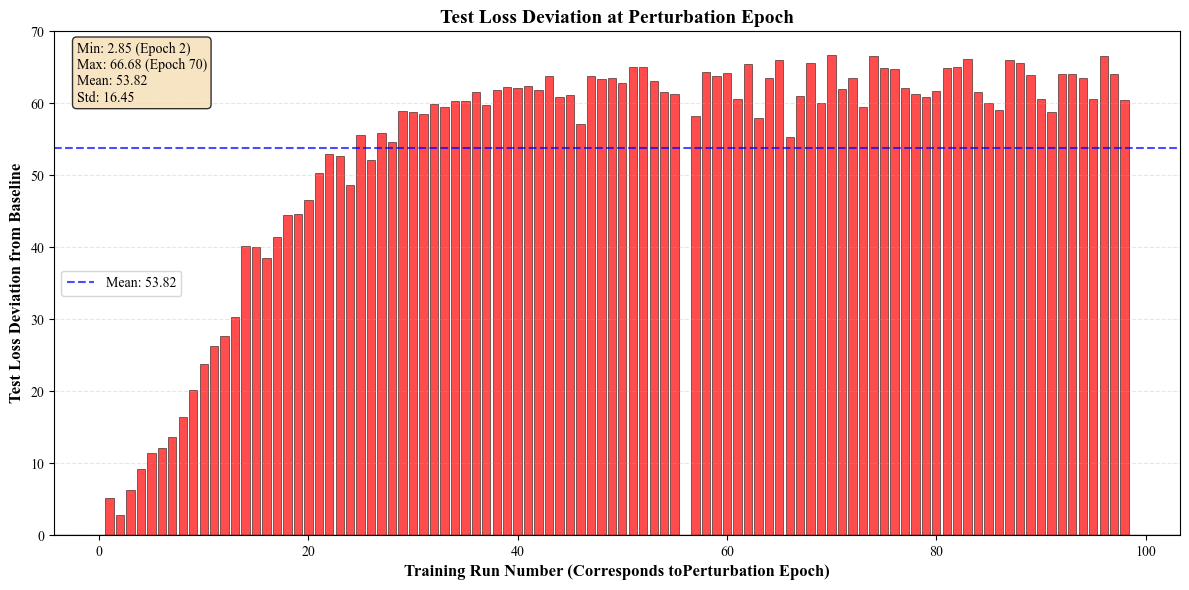


Test loss deviation at perturbation epoch statistics:
  Overall minimum: 2.85
  Overall maximum: 66.68
  Mean: 53.82
  Standard deviation: 16.45
  Range: 63.83

Deviation breakdown:
  Positive deviations (higher loss): 97
  Negative deviations (lower loss): 0
  Zero deviations (same loss): 0

Deviation examples:
  Run 1: +5.20 deviation
  Run 2: +2.85 deviation
  Run 3: +6.33 deviation
  Run 4: +9.14 deviation
  Run 5: +11.36 deviation


In [21]:
# Plot test loss deviation at perturbation epoch compared to baseline
perturbation_deviations = []
run_numbers_deviation = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    # Skip run 56 since it failed
    if run_num == 56:
        continue
    
    perturb_epoch = int(run_num)
    
    # Get test loss at perturbation epoch for this run
    run_at_perturb = df[df['epoch'] == perturb_epoch]
    
    # Get baseline test loss at the same epoch
    baseline_at_perturb = baseline_df_clean[baseline_df_clean['epoch'] == perturb_epoch]
    
    if len(run_at_perturb) > 0 and len(baseline_at_perturb) > 0:
        run_loss = run_at_perturb.iloc[0]['test_loss']
        baseline_loss = baseline_at_perturb.iloc[0]['test_loss']
        
        # Calculate deviation (run - baseline)
        deviation = run_loss - baseline_loss
        perturbation_deviations.append(deviation)
        run_numbers_deviation.append(run_num)

# Sort by run number for proper ordering
sorted_data_deviation = sorted(zip(run_numbers_deviation, perturbation_deviations))
run_numbers_deviation_sorted, perturbation_deviations_sorted = zip(*sorted_data_deviation)

# Create the bar plot
plt.figure(figsize=(12, 6))
colors = ['red' if dev > 0 else 'green' for dev in perturbation_deviations_sorted]
plt.bar(run_numbers_deviation_sorted, perturbation_deviations_sorted, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
plt.xlabel('Training Run Number (Corresponds toPerturbation Epoch)', fontsize=12, fontweight='bold')
plt.ylabel('Test Loss Deviation from Baseline', fontsize=12, fontweight='bold')
plt.title('Test Loss Deviation at Perturbation Epoch', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add zero line
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

# Add some statistics
min_deviation_overall = min(perturbation_deviations_sorted)
max_deviation_overall = max(perturbation_deviations_sorted)
mean_deviation = np.mean(perturbation_deviations_sorted)

# Add mean line
plt.axhline(y=mean_deviation, color='blue', linestyle='--', alpha=0.7, label=f'Mean: {mean_deviation:.2f}')
plt.legend()

# Add text box with statistics
stats_text_deviation = f'Min: {min_deviation_overall:.2f} (Epoch {run_numbers_deviation_sorted[np.argmin(perturbation_deviations_sorted)]})\nMax: {max_deviation_overall:.2f} (Epoch {run_numbers_deviation_sorted[np.argmax(perturbation_deviations_sorted)]})\nMean: {mean_deviation:.2f}\nStd: {np.std(perturbation_deviations_sorted):.2f}'
plt.text(0.02, 0.98, stats_text_deviation, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nTest loss deviation at perturbation epoch statistics:")
print(f"  Overall minimum: {min_deviation_overall:.2f}")
print(f"  Overall maximum: {max_deviation_overall:.2f}")
print(f"  Mean: {mean_deviation:.2f}")
print(f"  Standard deviation: {np.std(perturbation_deviations_sorted):.2f}")
print(f"  Range: {max_deviation_overall - min_deviation_overall:.2f}")

# Count positive vs negative deviations
positive_deviations = sum(1 for dev in perturbation_deviations_sorted if dev > 0)
negative_deviations = sum(1 for dev in perturbation_deviations_sorted if dev < 0)
zero_deviations = sum(1 for dev in perturbation_deviations_sorted if dev == 0)

print(f"\nDeviation breakdown:")
print(f"  Positive deviations (higher loss): {positive_deviations}")
print(f"  Negative deviations (lower loss): {negative_deviations}")
print(f"  Zero deviations (same loss): {zero_deviations}")

# Print some examples for verification
print(f"\nDeviation examples:")
for i in range(min(5, len(run_numbers_deviation_sorted))):
    run_num = run_numbers_deviation_sorted[i]
    deviation = perturbation_deviations_sorted[i]
    print(f"  Run {run_num}: {deviation:+.2f} deviation")


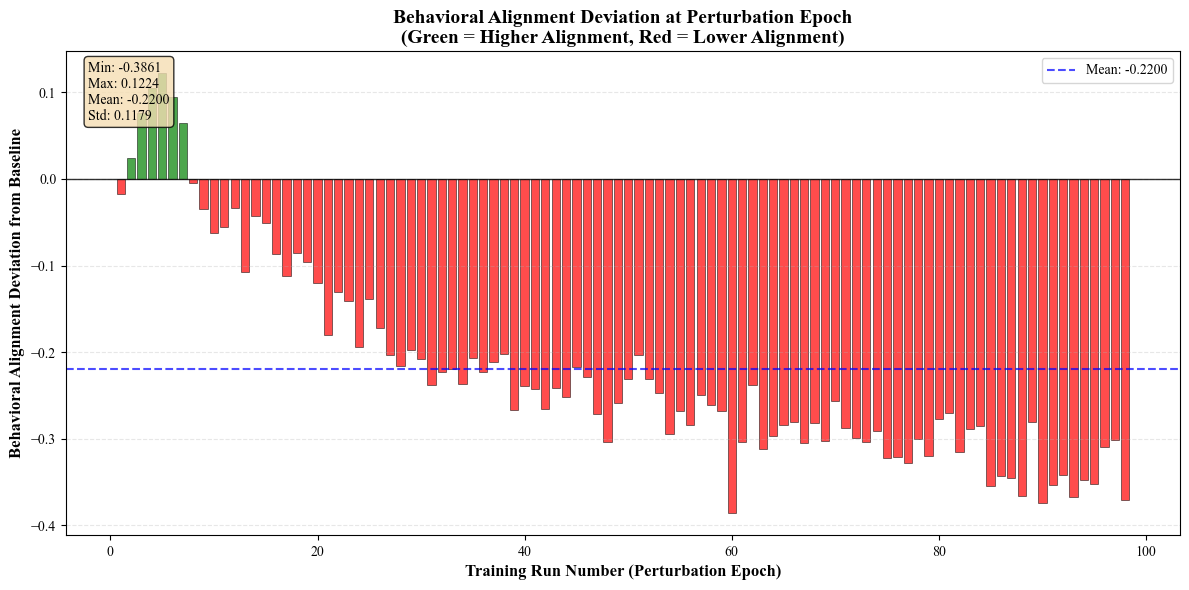


Behavioral alignment deviation at perturbation epoch statistics:
  Overall minimum: -0.3861
  Overall maximum: 0.1224
  Mean: -0.2200
  Standard deviation: 0.1179
  Range: 0.5084

Deviation breakdown:
  Positive deviations (higher alignment): 6
  Negative deviations (lower alignment): 92
  Zero deviations (same alignment): 0

Deviation examples:
  Run 1: -0.0171 deviation
  Run 2: +0.0246 deviation
  Run 3: +0.0760 deviation
  Run 4: +0.1051 deviation
  Run 5: +0.1224 deviation


In [45]:
# Plot behavioral alignment deviation at perturbation epoch compared to baseline
perturbation_deviations_ba = []
run_numbers_deviation_ba = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    
    perturb_epoch = int(run_num)
    
    # Get behavioral alignment at perturbation epoch for this run
    run_at_perturb = df[df['epoch'] == perturb_epoch]
    
    # Get baseline behavioral alignment at the same epoch
    baseline_at_perturb = baseline_df_clean[baseline_df_clean['epoch'] == perturb_epoch]
    
    if len(run_at_perturb) > 0 and len(baseline_at_perturb) > 0:
        run_ba = run_at_perturb.iloc[0]['behavioral_rsa_rho']
        baseline_ba = baseline_at_perturb.iloc[0]['behavioral_rsa_rho']
        
        # Calculate deviation (run - baseline)
        deviation = run_ba - baseline_ba
        perturbation_deviations_ba.append(deviation)
        run_numbers_deviation_ba.append(run_num)

# Sort by run number for proper ordering
sorted_data_deviation_ba = sorted(zip(run_numbers_deviation_ba, perturbation_deviations_ba))
run_numbers_deviation_ba_sorted, perturbation_deviations_ba_sorted = zip(*sorted_data_deviation_ba)

# Create the bar plot
plt.figure(figsize=(12, 6))
colors = ['green' if dev > 0 else 'red' for dev in perturbation_deviations_ba_sorted]
plt.bar(run_numbers_deviation_ba_sorted, perturbation_deviations_ba_sorted, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
plt.xlabel('Training Run Number (Perturbation Epoch)', fontsize=12, fontweight='bold')
plt.ylabel('Behavioral Alignment Deviation from Baseline', fontsize=12, fontweight='bold')
plt.title('Behavioral Alignment Deviation at Perturbation Epoch\n(Green = Higher Alignment, Red = Lower Alignment)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add zero line
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

# Add some statistics
min_deviation_ba_overall = min(perturbation_deviations_ba_sorted)
max_deviation_ba_overall = max(perturbation_deviations_ba_sorted)
mean_deviation_ba = np.mean(perturbation_deviations_ba_sorted)

# Add mean line
plt.axhline(y=mean_deviation_ba, color='blue', linestyle='--', alpha=0.7, label=f'Mean: {mean_deviation_ba:.4f}')
plt.legend()

# Add text box with statistics
stats_text_deviation_ba = f'Min: {min_deviation_ba_overall:.4f}\nMax: {max_deviation_ba_overall:.4f}\nMean: {mean_deviation_ba:.4f}\nStd: {np.std(perturbation_deviations_ba_sorted):.4f}'
plt.text(0.02, 0.98, stats_text_deviation_ba, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nBehavioral alignment deviation at perturbation epoch statistics:")
print(f"  Overall minimum: {min_deviation_ba_overall:.4f}")
print(f"  Overall maximum: {max_deviation_ba_overall:.4f}")
print(f"  Mean: {mean_deviation_ba:.4f}")
print(f"  Standard deviation: {np.std(perturbation_deviations_ba_sorted):.4f}")
print(f"  Range: {max_deviation_ba_overall - min_deviation_ba_overall:.4f}")

# Count positive vs negative deviations
positive_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev > 0)
negative_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev < 0)
zero_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev == 0)

print(f"\nDeviation breakdown:")
print(f"  Positive deviations (higher alignment): {positive_deviations_ba}")
print(f"  Negative deviations (lower alignment): {negative_deviations_ba}")
print(f"  Zero deviations (same alignment): {zero_deviations_ba}")

# Print some examples for verification
print(f"\nDeviation examples:")
for i in range(min(5, len(run_numbers_deviation_ba_sorted))):
    run_num = run_numbers_deviation_ba_sorted[i]
    deviation = perturbation_deviations_ba_sorted[i]
    print(f"  Run {run_num}: {deviation:+.4f} deviation")


Baseline behavioral alignment AUC: 86.5262


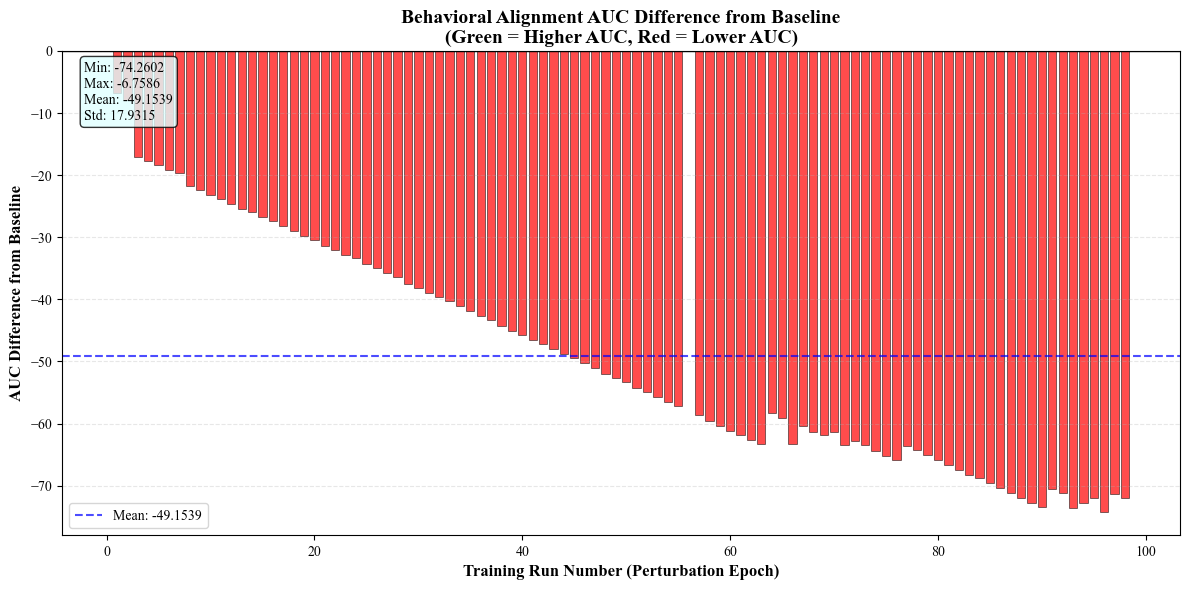


Behavioral alignment AUC difference statistics:
  Overall minimum: -74.2602
  Overall maximum: -6.7586
  Mean: -49.1539
  Standard deviation: 17.9315
  Range: 67.5016

AUC difference breakdown:
  Positive differences (higher AUC): 0
  Negative differences (lower AUC): 97
  Zero differences (same AUC): 0

AUC difference examples:
  Run 1: -6.7586 AUC difference
  Run 2: -7.8385 AUC difference
  Run 3: -17.0551 AUC difference
  Run 4: -17.7097 AUC difference
  Run 5: -18.4211 AUC difference

Percentage of runs that outperform baseline: 0.0%


In [48]:
# Plot Area Under the Curve (AUC) difference for behavioral alignment
auc_differences = []
run_numbers_auc = []

# Calculate baseline AUC for behavioral alignment
baseline_sorted = baseline_df_clean.sort_values('epoch')
baseline_epochs = baseline_sorted['epoch'].values
baseline_ba_values = baseline_sorted['behavioral_rsa_rho'].values
baseline_auc = np.trapz(baseline_ba_values, baseline_epochs)

print(f"Baseline behavioral alignment AUC: {baseline_auc:.4f}")

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    # Skip run 56 since it failed
    if run_num == 56:
        continue
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    run_epochs = df_sorted['epoch'].values
    run_ba_values = df_sorted['behavioral_rsa_rho'].values
    
    # Calculate AUC for this run
    run_auc = np.trapz(run_ba_values, run_epochs)
    
    # Calculate difference from baseline (run - baseline)
    auc_difference = run_auc - baseline_auc
    auc_differences.append(auc_difference)
    run_numbers_auc.append(run_num)

# Sort by run number for proper ordering
sorted_data_auc = sorted(zip(run_numbers_auc, auc_differences))
run_numbers_auc_sorted, auc_differences_sorted = zip(*sorted_data_auc)

# Create the bar plot
plt.figure(figsize=(12, 6))
colors = ['green' if diff > 0 else 'red' for diff in auc_differences_sorted]
plt.bar(run_numbers_auc_sorted, auc_differences_sorted, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
plt.xlabel('Training Run Number (Perturbation Epoch)', fontsize=12, fontweight='bold')
plt.ylabel('AUC Difference from Baseline', fontsize=12, fontweight='bold')
plt.title('Behavioral Alignment AUC Difference from Baseline\n(Green = Higher AUC, Red = Lower AUC)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add zero line
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

# Add some statistics
min_auc_diff_overall = min(auc_differences_sorted)
max_auc_diff_overall = max(auc_differences_sorted)
mean_auc_diff = np.mean(auc_differences_sorted)

# Add mean line
plt.axhline(y=mean_auc_diff, color='blue', linestyle='--', alpha=0.7, label=f'Mean: {mean_auc_diff:.4f}')
plt.legend()

# Add text box with statistics
stats_text_auc = f'Min: {min_auc_diff_overall:.4f}\nMax: {max_auc_diff_overall:.4f}\nMean: {mean_auc_diff:.4f}\nStd: {np.std(auc_differences_sorted):.4f}'
plt.text(0.02, 0.98, stats_text_auc, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nBehavioral alignment AUC difference statistics:")
print(f"  Overall minimum: {min_auc_diff_overall:.4f}")
print(f"  Overall maximum: {max_auc_diff_overall:.4f}")
print(f"  Mean: {mean_auc_diff:.4f}")
print(f"  Standard deviation: {np.std(auc_differences_sorted):.4f}")
print(f"  Range: {max_auc_diff_overall - min_auc_diff_overall:.4f}")

# Count positive vs negative differences
positive_auc_diffs = sum(1 for diff in auc_differences_sorted if diff > 0)
negative_auc_diffs = sum(1 for diff in auc_differences_sorted if diff < 0)
zero_auc_diffs = sum(1 for diff in auc_differences_sorted if diff == 0)

print(f"\nAUC difference breakdown:")
print(f"  Positive differences (higher AUC): {positive_auc_diffs}")
print(f"  Negative differences (lower AUC): {negative_auc_diffs}")
print(f"  Zero differences (same AUC): {zero_auc_diffs}")

# Print some examples for verification
print(f"\nAUC difference examples:")
for i in range(min(5, len(run_numbers_auc_sorted))):
    run_num = run_numbers_auc_sorted[i]
    auc_diff = auc_differences_sorted[i]
    print(f"  Run {run_num}: {auc_diff:+.4f} AUC difference")

# Calculate percentage of runs that outperform baseline
outperform_percentage = (positive_auc_diffs / len(auc_differences_sorted)) * 100
print(f"\nPercentage of runs that outperform baseline: {outperform_percentage:.1f}%")


# Perturbation Lengths

In [5]:
all_dirs_after = sorted([d for d in Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops').iterdir() 
                        if d.is_dir() and d.name >= '20251021_140839'])
print(all_dirs_after)

# perturb_length_run_dirs = [e70_l20_results_dir, e70_l10_results_dir, e70_l5_results_dir, e70_l2_results_dir, e2_l30_results_dir, e2_l20_results_dir, e2_l10_results_dir, e2_l5_results_dir, e2_l2_results_dir]

[PosixPath('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_140839'), PosixPath('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_160408'), PosixPath('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_173027'), PosixPath('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_195226'), PosixPath('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_213321'), PosixPath('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_230543'), PosixPath('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_lo

In [6]:
# Read in all of the metrics.csv files from perturb_length_run_dirs

all_perturb_length_dfs = []

for run_dir in all_dirs_after:
    # go two directories down from the current path
    for sub_dir1 in run_dir.iterdir():
        if sub_dir1.is_dir():
            for sub_dir2 in sub_dir1.iterdir():
                if sub_dir2.is_dir():
                    metrics_path = sub_dir2 / 'metrics.csv'
                    print(metrics_path)
                    if metrics_path.exists():
                        df = pd.read_csv(metrics_path)
                        df['run_dir'] = sub_dir2.name  # Optionally track which run this came from
                        all_perturb_length_dfs.append(df)
                    else:
                        print(f"Warning: {metrics_path} does not exist.")
    continue  # skip the rest of the old logic for this rewrite
    # metrics_path = run_dir / 'metrics.csv'
    # if metrics_path.exists():
    #     df = pd.read_csv(metrics_path)
    #     df['run_dir'] = run_dir.name  # Optionally track which run this came from
    #     all_perturb_length_dfs.append(df)
    # else:
    #     print(f"Warning: {metrics_path} does not exist.")

# If you want a single DataFrame:
if all_perturb_length_dfs:
    all_perturb_length_data = pd.concat(all_perturb_length_dfs, ignore_index=True)
else:
    all_perturb_length_data = pd.DataFrame()

print(all_perturb_length_data)

/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_140839/output/random_target_e2_l2/metrics.csv
/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_160408/output/random_target_e2_l5/metrics.csv
/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_173027/output/random_target_e2_l10/metrics.csv
/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_195226/output/random_target_e2_l20/metrics.csv
/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_213321/output/random_target_e2_l30/metrics.csv
/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251021_230543/output/ran

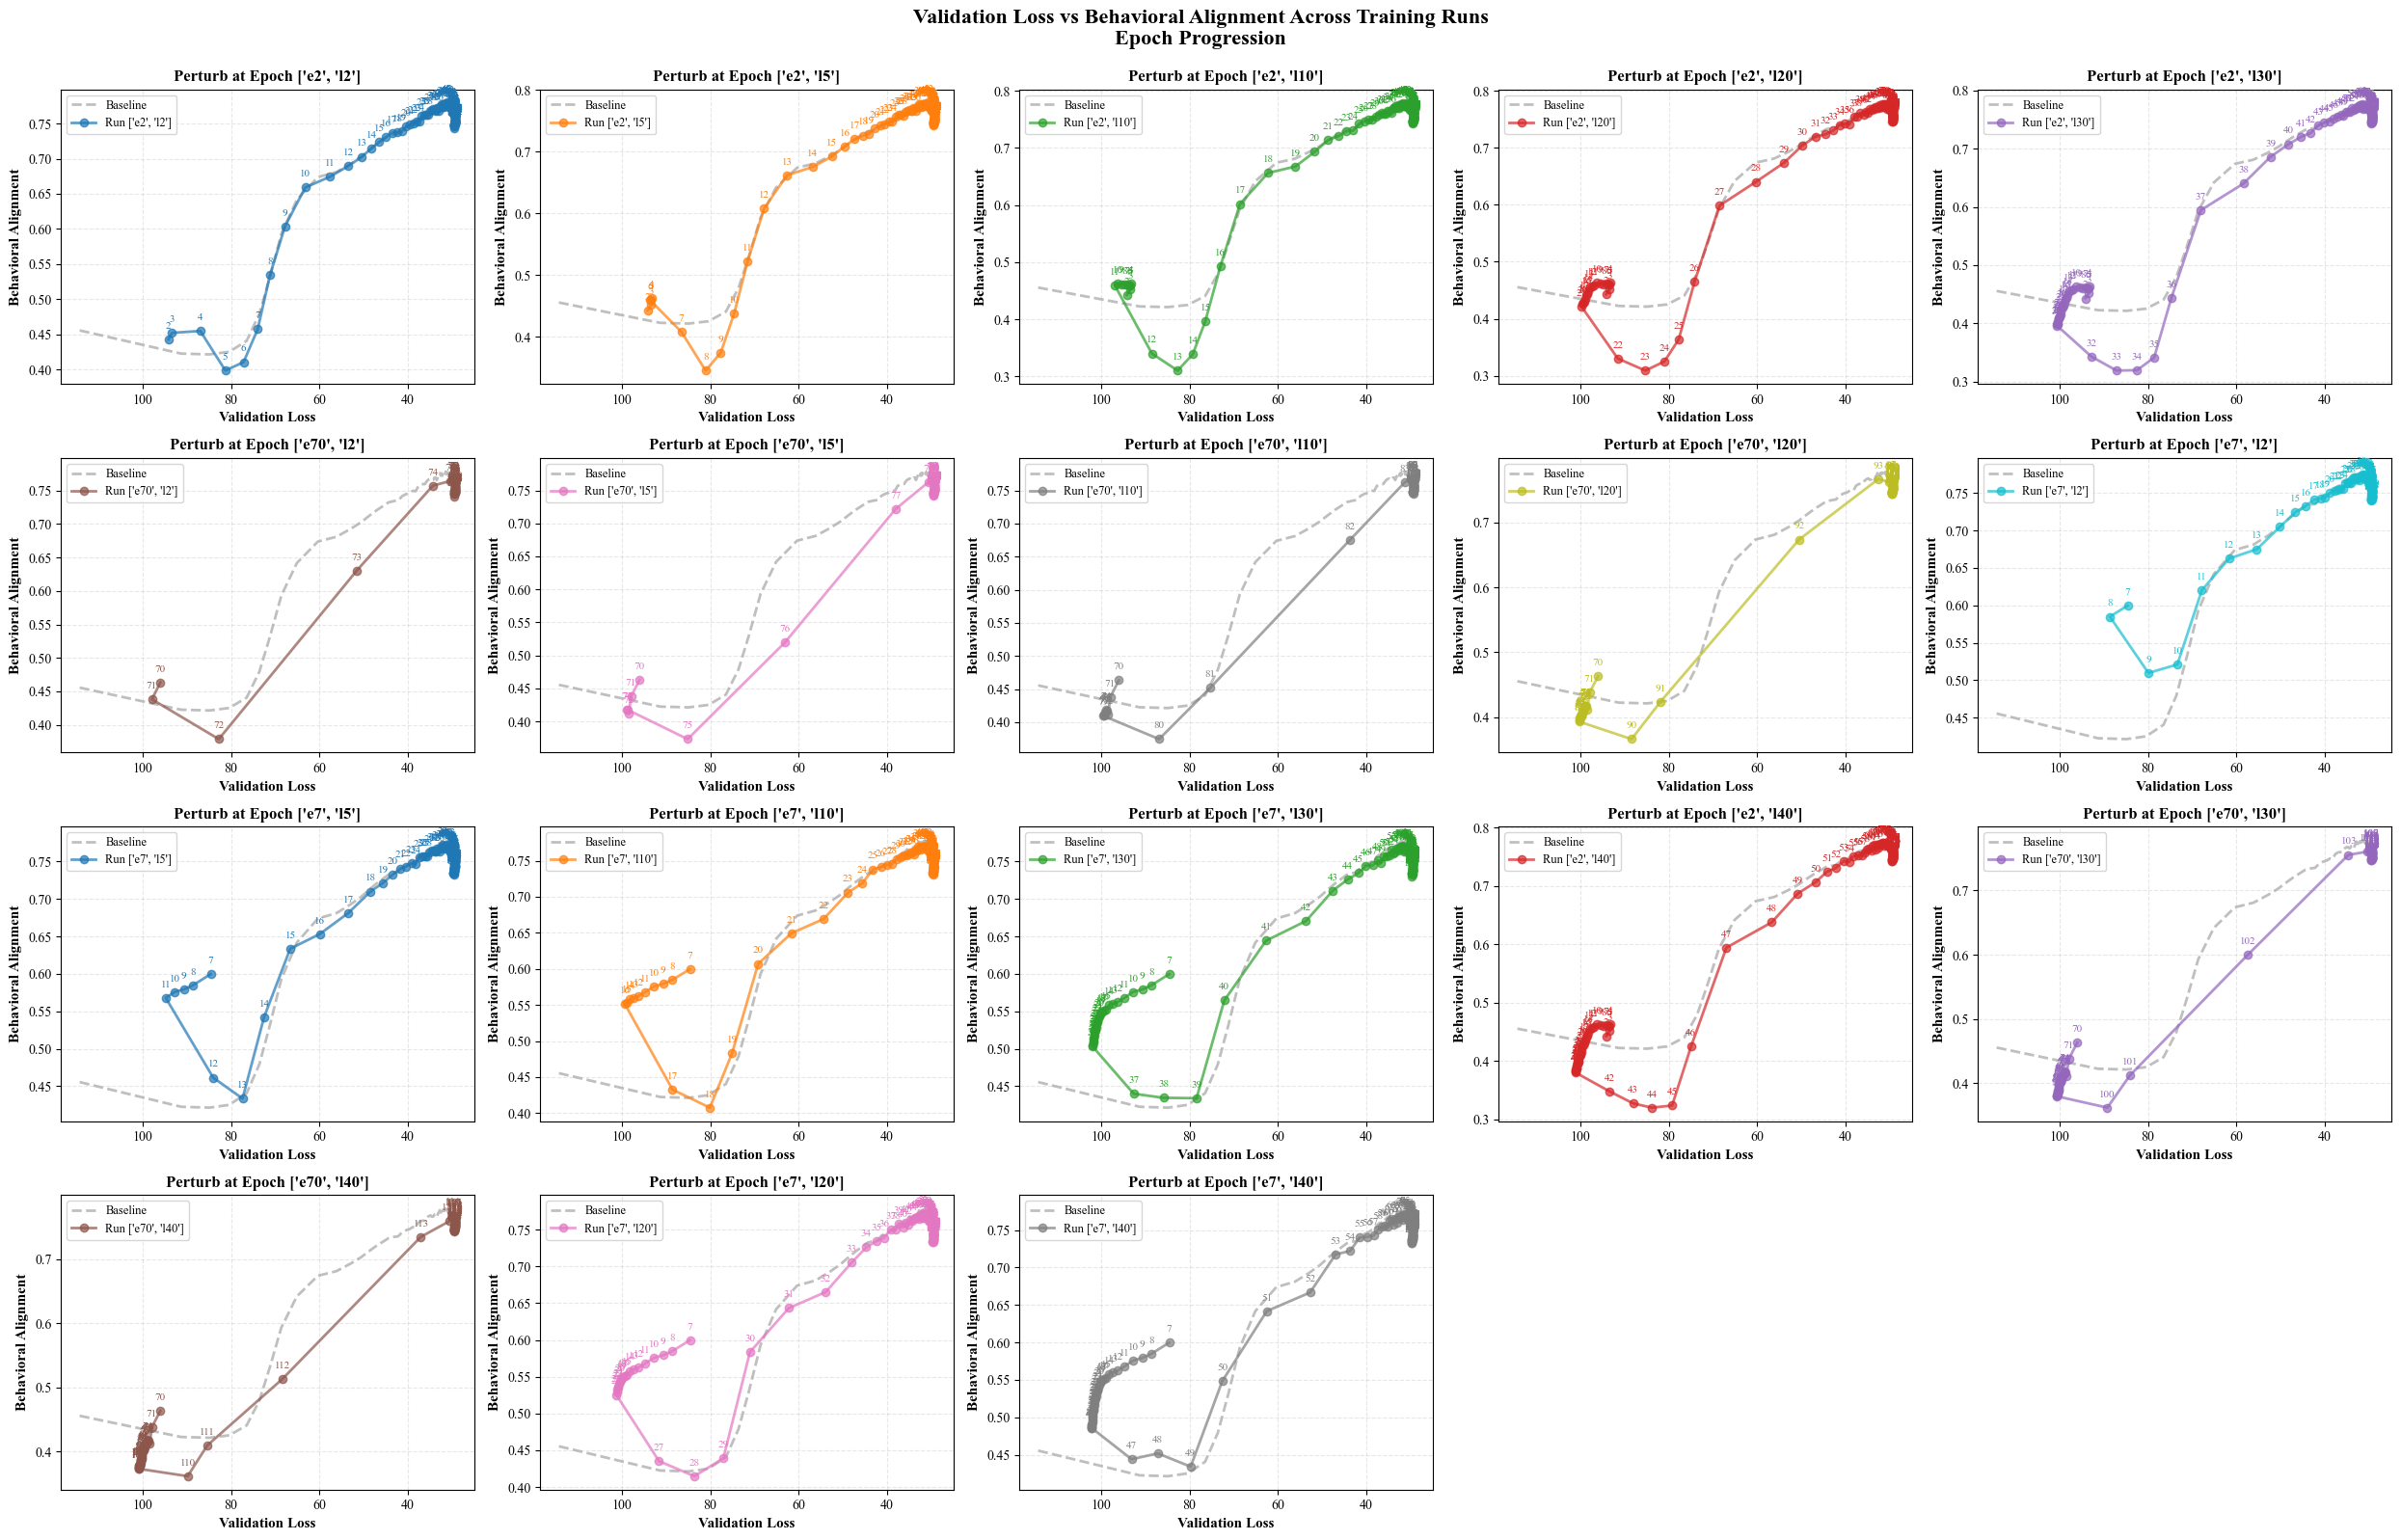

In [7]:
# Create multi-panel figure with separate subplot for each training run
n_runs = len(all_perturb_length_dfs)

# Determine grid layout (try to make it roughly square)
n_cols = int(np.ceil(np.sqrt(n_runs)))
n_rows = int(np.ceil(n_runs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Flatten axes array for easier indexing
if n_runs > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Use a consistent color scheme
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for idx, df in enumerate(all_perturb_length_dfs):
    ax = axes[idx]

    run_name = df['run_dir'].iloc[0]
    
    # Sort by epoch to ensure proper line connection
    df_sorted = df.sort_values('epoch')
    
    # Extract run number for title
    run_num = run_name.split('_')[2:]
    
    # Plot baseline first if available
    baseline_at_perturb = None
    if baseline_df is not None:
        baseline_sorted = baseline_df_clean.sort_values('epoch')
        ax.plot(baseline_sorted['test_loss'], 
                baseline_sorted['behavioral_rsa_rho'],
                linestyle='--',
                linewidth=2,
                color='gray',
                alpha=0.5,
                label='Baseline',
                zorder=1)
    
    # Plot perturbation run line with markers
    line, = ax.plot(df_sorted['test_loss'], 
            df_sorted['behavioral_rsa_rho'],
            marker='o',
            markersize=6,
            linewidth=2,
            color=colors[idx % 10],
            alpha=0.7,
            label=f'Run {run_num}',
            zorder=2)
    
    # Label the epoch numbers on each marker for this curve
    for i, (x, y, epoch) in enumerate(zip(df_sorted['test_loss'], df_sorted['behavioral_rsa_rho'], df_sorted['epoch'])):
        ax.annotate(
            str(int(epoch)),
            (x, y),
            textcoords="offset points",
            xytext=(0, 8),  # offset to avoid overlapping the marker
            ha='center',
            fontsize=8,
            color=colors[idx % 10],
            zorder=10
        )

    # Formatting
    ax.set_xlabel('Validation Loss', fontsize=11, fontweight='bold')
    ax.set_ylabel('Behavioral Alignment', fontsize=11, fontweight='bold')
    ax.set_title(f'Perturb at Epoch {run_num}', # ({len(df_sorted)} epochs: {int(df_sorted["epoch"].min())}-{int(df_sorted["epoch"].max())})', 
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='best', fontsize=9, framealpha=0.8)
    
    # Flip x-axis so loss goes from high to low
    ax.invert_xaxis()
    
    # # Add summary text
    # summary_text = f"Start: {first_epoch['behavioral_rsa_rho']:.3f}\nEnd: {last_epoch['behavioral_rsa_rho']:.3f}"
    # ax.text(0.02, 0.98, summary_text, transform=ax.transAxes,
    #         fontsize=9, verticalalignment='top',
    #         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Hide any unused subplots
for idx in range(n_runs, len(axes)):
    axes[idx].set_visible(False)

# Add overall title
fig.suptitle('Validation Loss vs Behavioral Alignment Across Training Runs\nEpoch Progression', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

In [8]:
# Analyze recovery times for the 9 specific perturbation length runs
print("Analyzing recovery times for perturbation length runs...")
print("="*60)

# First, let's examine the actual run names to understand the format
print("Actual run names:")
for df in all_perturb_length_dfs:
    run_name = df['run_dir'].iloc[0]
    print(f"  {run_name}")

print("\nParsing run names...")

# Extract metadata for each run
run_metadata = []
for df in all_perturb_length_dfs:
    run_name = df['run_dir'].iloc[0]
    
    # Parse run name - format appears to be "random_target_e{epoch}_l{length}"
    # Let's handle this more carefully
    if 'random_target_e' in run_name:
        # Extract epoch and length from format like "random_target_e70_l20"
        parts = run_name.split('_')
        start_epoch = None
        length = None
        
        for part in parts:
            if part.startswith('e') and part[1:].isdigit():
                start_epoch = int(part[1:])
            elif part.startswith('l') and part[1:].isdigit():
                length = int(part[1:])
        
        if start_epoch is not None and length is not None:
            run_metadata.append({
                'run_name': run_name,
                'start_epoch': start_epoch,
                'length': length,
                'df': df
            })
            
            print(f"Run: {run_name}")
            print(f"  Start epoch: {start_epoch}")
            print(f"  Length: {length} epochs")
            print(f"  Total epochs: {len(df)}")
            print()
        else:
            print(f"Warning: Could not parse run name: {run_name}")
    else:
        print(f"Warning: Unexpected run name format: {run_name}")

print(f"Total runs parsed: {len(run_metadata)}")


Analyzing recovery times for perturbation length runs...
Actual run names:
  random_target_e2_l2
  random_target_e2_l5
  random_target_e2_l10
  random_target_e2_l20
  random_target_e2_l30
  random_target_e70_l2
  random_target_e70_l5
  random_target_e70_l10
  random_target_e70_l20
  random_target_e7_l2
  random_target_e7_l5
  random_target_e7_l10
  random_target_e7_l30
  random_target_e2_l40
  random_target_e70_l30
  random_target_e70_l40
  random_target_e7_l20
  random_target_e7_l40

Parsing run names...
Run: random_target_e2_l2
  Start epoch: 2
  Length: 2 epochs
  Total epochs: 117

Run: random_target_e2_l5
  Start epoch: 2
  Length: 5 epochs
  Total epochs: 117

Run: random_target_e2_l10
  Start epoch: 2
  Length: 10 epochs
  Total epochs: 117

Run: random_target_e2_l20
  Start epoch: 2
  Length: 20 epochs
  Total epochs: 117

Run: random_target_e2_l30
  Start epoch: 2
  Length: 30 epochs
  Total epochs: 127

Run: random_target_e70_l2
  Start epoch: 70
  Length: 2 epochs
  Total ep

In [9]:
# Calculate recovery times for behavioral alignment within 1% of baseline
recovery_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    df = run_info['df']
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    
    # Calculate when perturbation ends
    perturbation_end = start_epoch + length - 1
    
    # Only check for recovery AFTER the perturbation period has ended
    # Filter data to only include epochs after perturbation
    post_perturbation_data = df_sorted[df_sorted['epoch'] > perturbation_end]
    
    if len(post_perturbation_data) == 0:
        # If no data after perturbation, mark as not recovered
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None
        })
        continue
    
    # Find the first epoch AFTER perturbation where behavioral_rsa_rho is within 1% of baseline
    recovery_epoch = None
    
    for _, row in post_perturbation_data.iterrows():
        current_epoch = int(row['epoch'])
        
        # Get baseline behavioral alignment at the same epoch
        baseline_at_same_epoch = baseline_df_clean[baseline_df_clean['epoch'] == current_epoch]
        
        if len(baseline_at_same_epoch) > 0:
            baseline_ba = baseline_at_same_epoch.iloc[0]['behavioral_rsa_rho']
            # For behavioral alignment, we want to be within 1% of baseline
            # Since higher is better, we check if run_ba >= baseline_ba * 0.99
            target_ba = baseline_ba * 0.99  # Within 1% of baseline (1% lower)
            
            if row['behavioral_rsa_rho'] >= target_ba:
                recovery_epoch = current_epoch
                break
    
    if recovery_epoch is not None:
        # Calculate epochs from end of perturbation to recovery
        epochs_to_recovery = recovery_epoch - perturbation_end
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': recovery_epoch,
            'epochs_to_recovery': epochs_to_recovery
        })
    else:
        # If never recovered after perturbation, mark as not recovered
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None
        })

# Print recovery results
print("Recovery Analysis Results:")
print("="*60)
for data in recovery_data:
    print(f"Run: {data['run_name']}")
    print(f"  Perturbation: Epoch {data['start_epoch']} to {data['perturbation_end']} (length: {data['length']})")
    if data['recovery_epoch'] is not None:
        print(f"  Recovery: Epoch {data['recovery_epoch']} ({data['epochs_to_recovery']} epochs after perturbation)")
    else:
        print(f"  Recovery: Never recovered within 1% of baseline after perturbation")
    print()


Recovery Analysis Results:
Run: random_target_e2_l2
  Perturbation: Epoch 2 to 3 (length: 2)
  Recovery: Epoch 4 (1 epochs after perturbation)

Run: random_target_e2_l5
  Perturbation: Epoch 2 to 6 (length: 5)
  Recovery: Epoch 19 (13 epochs after perturbation)

Run: random_target_e2_l10
  Perturbation: Epoch 2 to 11 (length: 10)
  Recovery: Epoch 31 (20 epochs after perturbation)

Run: random_target_e2_l20
  Perturbation: Epoch 2 to 21 (length: 20)
  Recovery: Epoch 45 (24 epochs after perturbation)

Run: random_target_e2_l30
  Perturbation: Epoch 2 to 31 (length: 30)
  Recovery: Epoch 55 (24 epochs after perturbation)

Run: random_target_e70_l2
  Perturbation: Epoch 70 to 71 (length: 2)
  Recovery: Epoch 75 (4 epochs after perturbation)

Run: random_target_e70_l5
  Perturbation: Epoch 70 to 74 (length: 5)
  Recovery: Epoch 78 (4 epochs after perturbation)

Run: random_target_e70_l10
  Perturbation: Epoch 70 to 79 (length: 10)
  Recovery: Epoch 83 (4 epochs after perturbation)

Run: r

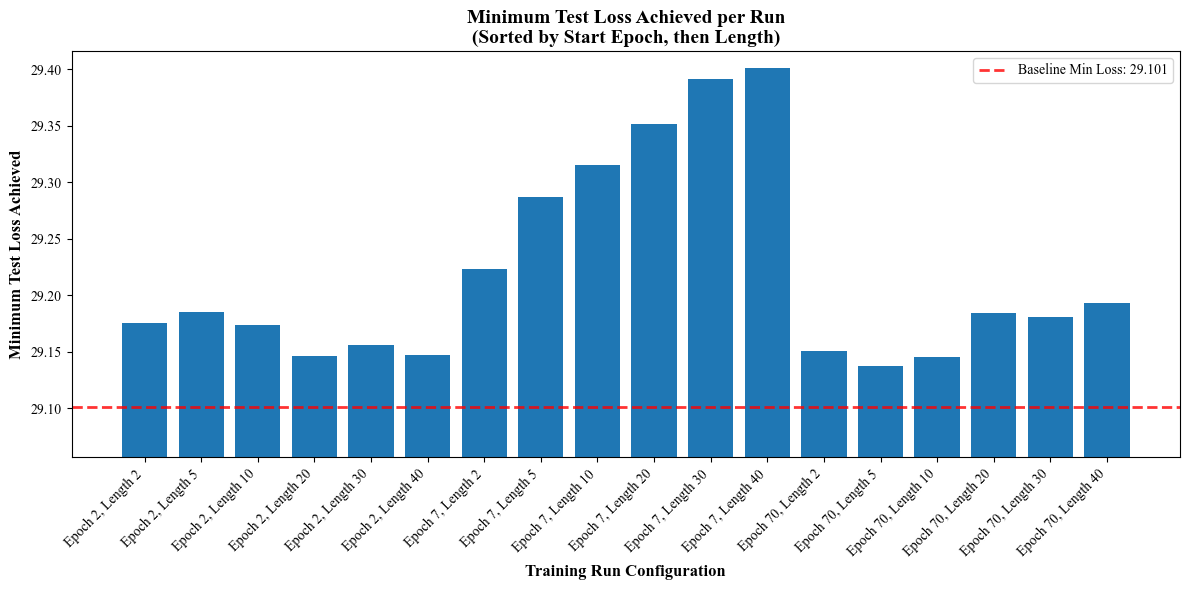

Run order (sorted by start epoch, then length):
   1. Epoch 2, Length 2 (min loss: 29.175)
   2. Epoch 2, Length 5 (min loss: 29.185)
   3. Epoch 2, Length 10 (min loss: 29.173)
   4. Epoch 2, Length 20 (min loss: 29.146)
   5. Epoch 2, Length 30 (min loss: 29.156)
   6. Epoch 2, Length 40 (min loss: 29.147)
   7. Epoch 7, Length 2 (min loss: 29.223)
   8. Epoch 7, Length 5 (min loss: 29.287)
   9. Epoch 7, Length 10 (min loss: 29.316)
  10. Epoch 7, Length 20 (min loss: 29.351)
  11. Epoch 7, Length 30 (min loss: 29.391)
  12. Epoch 7, Length 40 (min loss: 29.401)
  13. Epoch 70, Length 2 (min loss: 29.150)
  14. Epoch 70, Length 5 (min loss: 29.137)
  15. Epoch 70, Length 10 (min loss: 29.145)
  16. Epoch 70, Length 20 (min loss: 29.184)
  17. Epoch 70, Length 30 (min loss: 29.181)
  18. Epoch 70, Length 40 (min loss: 29.193)

Baseline minimum test loss: 29.101
Runs better than baseline: 0/18
Runs worse than baseline: 18/18


In [10]:
# Group all_perturb_length_data by 'run_dir' and plot the minimum test loss achieved for each one,
# with x-axis labels showing "Epoch X, length Y" format, sorted by epoch then length

if 'run_dir' in all_perturb_length_data.columns:
    grouped = all_perturb_length_data.groupby('run_dir')
    min_test_losses = grouped['test_loss'].min().reset_index()

    # Create labels in "Epoch X, length Y" format and extract sorting keys
    def parse_run_name(run_name):
        """Extract epoch and length from run name for sorting and labeling"""
        if 'random_target_e' in run_name:
            # Parse run name - format: "random_target_e{epoch}_l{length}"
            parts = run_name.split('_')
            start_epoch = None
            length = None
            
            for part in parts:
                if part.startswith('e') and part[1:].isdigit():
                    start_epoch = int(part[1:])
                elif part.startswith('l') and part[1:].isdigit():
                    length = int(part[1:])
            
            if start_epoch is not None and length is not None:
                return start_epoch, length, f"Epoch {start_epoch}, Length {length}"
            else:
                return 0, 0, run_name  # fallback
        else:
            return 0, 0, run_name  # fallback
    
    # Parse all run names and create sorting data
    run_data = []
    for _, row in min_test_losses.iterrows():
        run_name = row['run_dir']
        start_epoch, length, label = parse_run_name(run_name)
        run_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'label': label,
            'min_loss': row['test_loss']
        })
    
    # Sort by start_epoch first, then by length
    run_data_sorted = sorted(run_data, key=lambda x: (x['start_epoch'], x['length']))
    
    # Extract sorted data for plotting
    sorted_labels = [item['label'] for item in run_data_sorted]
    sorted_losses = [item['min_loss'] for item in run_data_sorted]

    # Calculate baseline minimum test loss
    baseline_min_loss = baseline_df_clean['test_loss'].min()

    plt.figure(figsize=(12,6))
    bars = plt.bar(range(len(sorted_losses)), sorted_losses)
    
    # Add horizontal dotted line for baseline minimum test loss
    plt.axhline(y=baseline_min_loss, color='red', linestyle='--', linewidth=2, 
                alpha=0.8, label=f'Baseline Min Loss: {baseline_min_loss:.3f}')
    
    plt.xlabel('Training Run Configuration', fontsize=12, fontweight='bold')
    plt.ylabel('Minimum Test Loss Achieved', fontsize=12, fontweight='bold')
    plt.title('Minimum Test Loss Achieved per Run\n(Sorted by Start Epoch, then Length)', fontsize=14, fontweight='bold')
    
    # Set x-axis labels
    plt.xticks(range(len(sorted_labels)), sorted_labels, rotation=45, ha='right')
    
    # Set the y-axis to zoom in: don't start at zero, but leave a bit of margin
    y_min = min(sorted_losses)
    y_max = max(sorted_losses)
    
    # Ensure baseline line is visible by expanding lower boundary if needed
    y_min = min(y_min, baseline_min_loss)
    y_range = y_max - y_min
    y_margin_lower = y_range * 0.15  # 15% margin on lower side
    y_margin_upper = y_range * 0.05  # 5% margin on upper side
    
    plt.ylim(y_min - y_margin_lower, y_max + y_margin_upper)

    # Add legend
    plt.legend(loc='best', fontsize=10, framealpha=0.8)

    plt.tight_layout()
    plt.show()
    
    # Print the sorted order for verification
    print("Run order (sorted by start epoch, then length):")
    for i, item in enumerate(run_data_sorted):
        print(f"  {i+1:2d}. {item['label']} (min loss: {item['min_loss']:.3f})")
    
    # Print baseline comparison
    print(f"\nBaseline minimum test loss: {baseline_min_loss:.3f}")
    better_than_baseline = sum(1 for loss in sorted_losses if loss < baseline_min_loss)
    worse_than_baseline = sum(1 for loss in sorted_losses if loss >= baseline_min_loss)
    print(f"Runs better than baseline: {better_than_baseline}/{len(sorted_losses)}")
    print(f"Runs worse than baseline: {worse_than_baseline}/{len(sorted_losses)}")
else:
    print("Column 'run_dir' not found in all_perturb_length_data.")


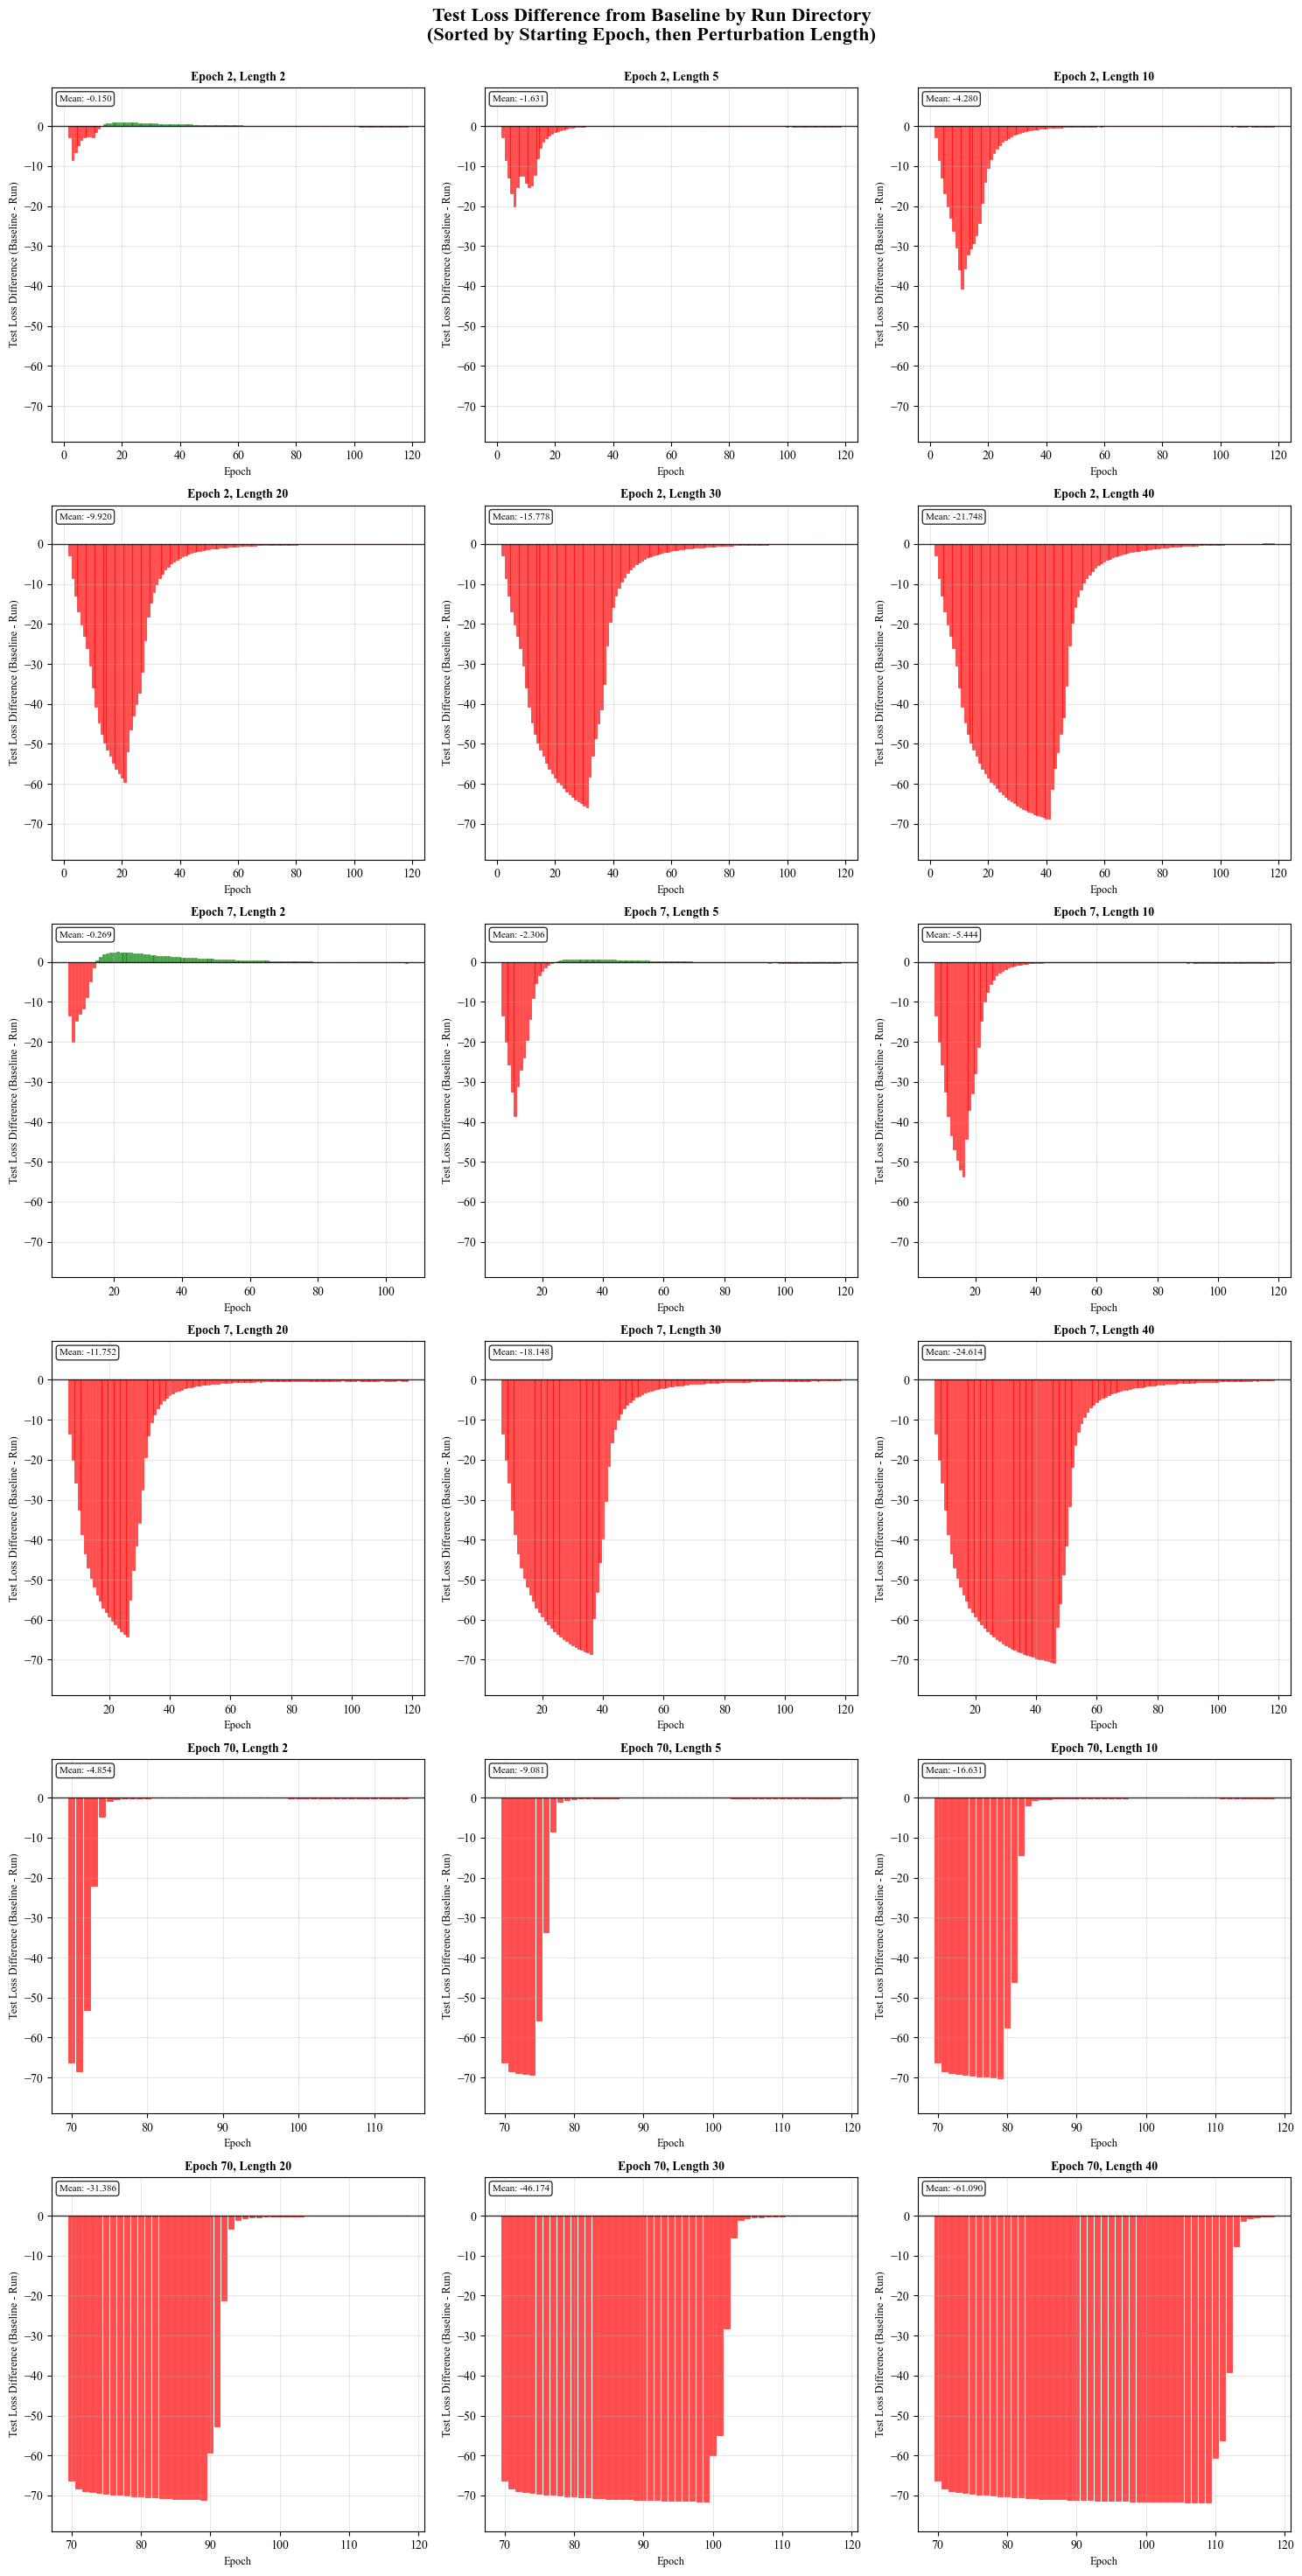


Summary:
Number of run_dir groups: 18
Total data points: 1777
Baseline data points: 118
Global y-axis range: [-78.9106, 9.6481]

Run order (sorted by start epoch, then length):
   1. Epoch 2, Length 2 (random_target_e2_l2)
   2. Epoch 2, Length 5 (random_target_e2_l5)
   3. Epoch 2, Length 10 (random_target_e2_l10)
   4. Epoch 2, Length 20 (random_target_e2_l20)
   5. Epoch 2, Length 30 (random_target_e2_l30)
   6. Epoch 2, Length 40 (random_target_e2_l40)
   7. Epoch 7, Length 2 (random_target_e7_l2)
   8. Epoch 7, Length 5 (random_target_e7_l5)
   9. Epoch 7, Length 10 (random_target_e7_l10)
  10. Epoch 7, Length 20 (random_target_e7_l20)
  11. Epoch 7, Length 30 (random_target_e7_l30)
  12. Epoch 7, Length 40 (random_target_e7_l40)
  13. Epoch 70, Length 2 (random_target_e70_l2)
  14. Epoch 70, Length 5 (random_target_e70_l5)
  15. Epoch 70, Length 10 (random_target_e70_l10)
  16. Epoch 70, Length 20 (random_target_e70_l20)
  17. Epoch 70, Length 30 (random_target_e70_l30)
  18. Ep

In [21]:
# Plot difference from baseline test_loss for each run_dir group as separate subplots with bar plots
# Sorted by starting epoch, then by perturbation length

# First, let's check if we have the baseline data and all_perturb_length_data
if 'baseline_df' in locals() and baseline_df is not None and 'all_perturb_length_data' in locals() and not all_perturb_length_data.empty:
    
    # Get unique run_dir values
    unique_run_dirs = all_perturb_length_data['run_dir'].unique()
    
    # Parse run names to extract epoch and length for sorting
    def parse_run_name(run_name):
        """Parse run name like 'random_target_e2_l2' to extract epoch and length"""
        try:
            # Extract epoch and length from run name
            parts = run_name.split('_')
            epoch_part = None
            length_part = None
            
            for part in parts:
                if part.startswith('e') and part[1:].isdigit():
                    epoch_part = int(part[1:])
                elif part.startswith('l') and part[1:].isdigit():
                    length_part = int(part[1:])
            
            return epoch_part, length_part
        except:
            return None, None
    
    # Create sorting data for each run
    run_data_for_sorting = []
    for run_dir in unique_run_dirs:
        start_epoch, length = parse_run_name(run_dir)
        if start_epoch is not None and length is not None:
            run_data_for_sorting.append({
                'run_dir': run_dir,
                'start_epoch': start_epoch,
                'length': length
            })
    
    # Sort by start_epoch first, then by length
    run_data_for_sorting.sort(key=lambda x: (x['start_epoch'], x['length']))
    
    # Extract sorted run_dirs
    sorted_run_dirs = [item['run_dir'] for item in run_data_for_sorting]
    
    # Calculate number of rows and columns for subplots
    n_runs = len(sorted_run_dirs)
    n_cols = 3  # 3 columns
    n_rows = (n_runs + n_cols - 1) // n_cols  # Ceiling division
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Flatten axes array for easier indexing
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.flatten()
    
    # First pass: collect all differences to determine global y-axis limits
    all_differences_global = []
    for run_dir in sorted_run_dirs:
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            test_loss = row['test_loss']
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            if len(baseline_at_epoch) > 0:
                baseline_test_loss = baseline_at_epoch['test_loss'].iloc[0]
                difference = baseline_test_loss - test_loss  # FIXED: Changed order
                all_differences_global.append(difference)
    
    # Set global y-axis limits
    if all_differences_global:
        global_min = min(all_differences_global)
        global_max = max(all_differences_global)
        padding = max(abs(global_min), abs(global_max)) * 0.1
        global_ylim = (global_min - padding, global_max + padding)
    else:
        global_ylim = (-0.01, 0.01)
    
    # Process each run_dir in sorted order
    for i, run_dir in enumerate(sorted_run_dirs):
        ax = axes_flat[i]
        
        # Filter data for this run_dir
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir].copy()
        
        # Sort by epoch to ensure proper ordering
        run_data = run_data.sort_values('epoch')
        
        # Calculate difference from baseline test_loss for each epoch
        differences = []
        epochs = []
        
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            test_loss = row['test_loss']
            
            # Find corresponding baseline test_loss for this epoch
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            
            if len(baseline_at_epoch) > 0:
                baseline_test_loss = baseline_at_epoch['test_loss'].iloc[0]
                difference = baseline_test_loss - test_loss  # FIXED: Changed order
                differences.append(difference)
                epochs.append(epoch)
        
        # Create bar plot
        if differences:  # Only plot if we have data
            bars = ax.bar(epochs, differences, 
                         color='steelblue', 
                         alpha=0.7,
                         edgecolor='navy',
                         linewidth=0.5)
            
            # Color bars based on whether they're positive or negative
            for j, bar in enumerate(bars):
                if differences[j] > 0:
                    bar.set_color('green')  # Better than baseline (positive difference means baseline was higher)
                    bar.set_alpha(0.7)
                else:
                    bar.set_color('red')  # Worse than baseline (negative difference means baseline was lower)
                    bar.set_alpha(0.7)
            
            # Add horizontal line at y=0 to show baseline
            ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
            
            # Get epoch and length for title
            start_epoch, length = parse_run_name(run_dir)
            title = f'Epoch {start_epoch}, Length {length}' if start_epoch is not None and length is not None else run_dir
            
            # Customize the subplot
            ax.set_title(title, fontsize=10, fontweight='bold')
            ax.set_xlabel('Epoch', fontsize=9)
            ax.set_ylabel('Test Loss Difference (Baseline - Run)', fontsize=9)
            ax.grid(True, alpha=0.3)
            
            # Set all subplots to use the same y-axis limits for comparison
            ax.set_ylim(global_ylim)
            
            # Add text annotation showing summary stats
            mean_diff = np.mean(differences)
            ax.text(0.02, 0.98, f'Mean: {mean_diff:.3f}', 
                   transform=ax.transAxes, 
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   fontsize=8)
    
    # Hide unused subplots
    for i in range(n_runs, len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    # Add overall title
    fig.suptitle('Test Loss Difference from Baseline by Run Directory\n(Sorted by Starting Epoch, then Perturbation Length)', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    
    # Show the plot
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary:")
    print(f"Number of run_dir groups: {len(sorted_run_dirs)}")
    print(f"Total data points: {len(all_perturb_length_data)}")
    print(f"Baseline data points: {len(baseline_df)}")
    print(f"Global y-axis range: [{global_ylim[0]:.4f}, {global_ylim[1]:.4f}]")
    
    # Print the sorted order for verification
    print("\nRun order (sorted by start epoch, then length):")
    for i, item in enumerate(run_data_for_sorting):
        print(f"  {i+1:2d}. Epoch {item['start_epoch']}, Length {item['length']} ({item['run_dir']})")
    
    # Calculate overall statistics
    all_differences = []
    for run_dir in sorted_run_dirs:
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            test_loss = row['test_loss']
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            if len(baseline_at_epoch) > 0:
                baseline_test_loss = baseline_at_epoch['test_loss'].iloc[0]
                difference = baseline_test_loss - test_loss  # FIXED: Changed order
                all_differences.append(difference)
    
    if all_differences:
        print(f"\nOverall Statistics:")
        print(f"Mean difference: {np.mean(all_differences):.4f}")
        print(f"Std difference: {np.std(all_differences):.4f}")
        print(f"Min difference: {np.min(all_differences):.4f}")
        print(f"Max difference: {np.max(all_differences):.4f}")
        
        # Count positive vs negative differences
        positive_diffs = sum(1 for d in all_differences if d > 0)
        negative_diffs = sum(1 for d in all_differences if d < 0)
        print(f"Positive differences (better than baseline): {positive_diffs}")
        print(f"Negative differences (worse than baseline): {negative_diffs}")
        
        # Print per-run statistics
        print(f"\nPer-run statistics:")
        for item in run_data_for_sorting:
            run_dir = item['run_dir']
            run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
            run_differences = []
            for _, row in run_data.iterrows():
                epoch = row['epoch']
                test_loss = row['test_loss']
                baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
                if len(baseline_at_epoch) > 0:
                    baseline_test_loss = baseline_at_epoch['test_loss'].iloc[0]
                    difference = baseline_test_loss - test_loss  # FIXED: Changed order
                    run_differences.append(difference)
            
            if run_differences:
                mean_diff = np.mean(run_differences)
                print(f"  Epoch {item['start_epoch']}, Length {item['length']}: Mean diff = {mean_diff:.4f}, Range = [{np.min(run_differences):.4f}, {np.max(run_differences):.4f}]")

else:
    print("Error: Missing baseline data or all_perturb_length_data")
    if 'baseline_df' not in locals():
        print("  - baseline_df not found")
    elif baseline_df is None:
        print("  - baseline_df is None")
    if 'all_perturb_length_data' not in locals():
        print("  - all_perturb_length_data not found")
    elif all_perturb_length_data.empty:
        print("  - all_perturb_length_data is empty")


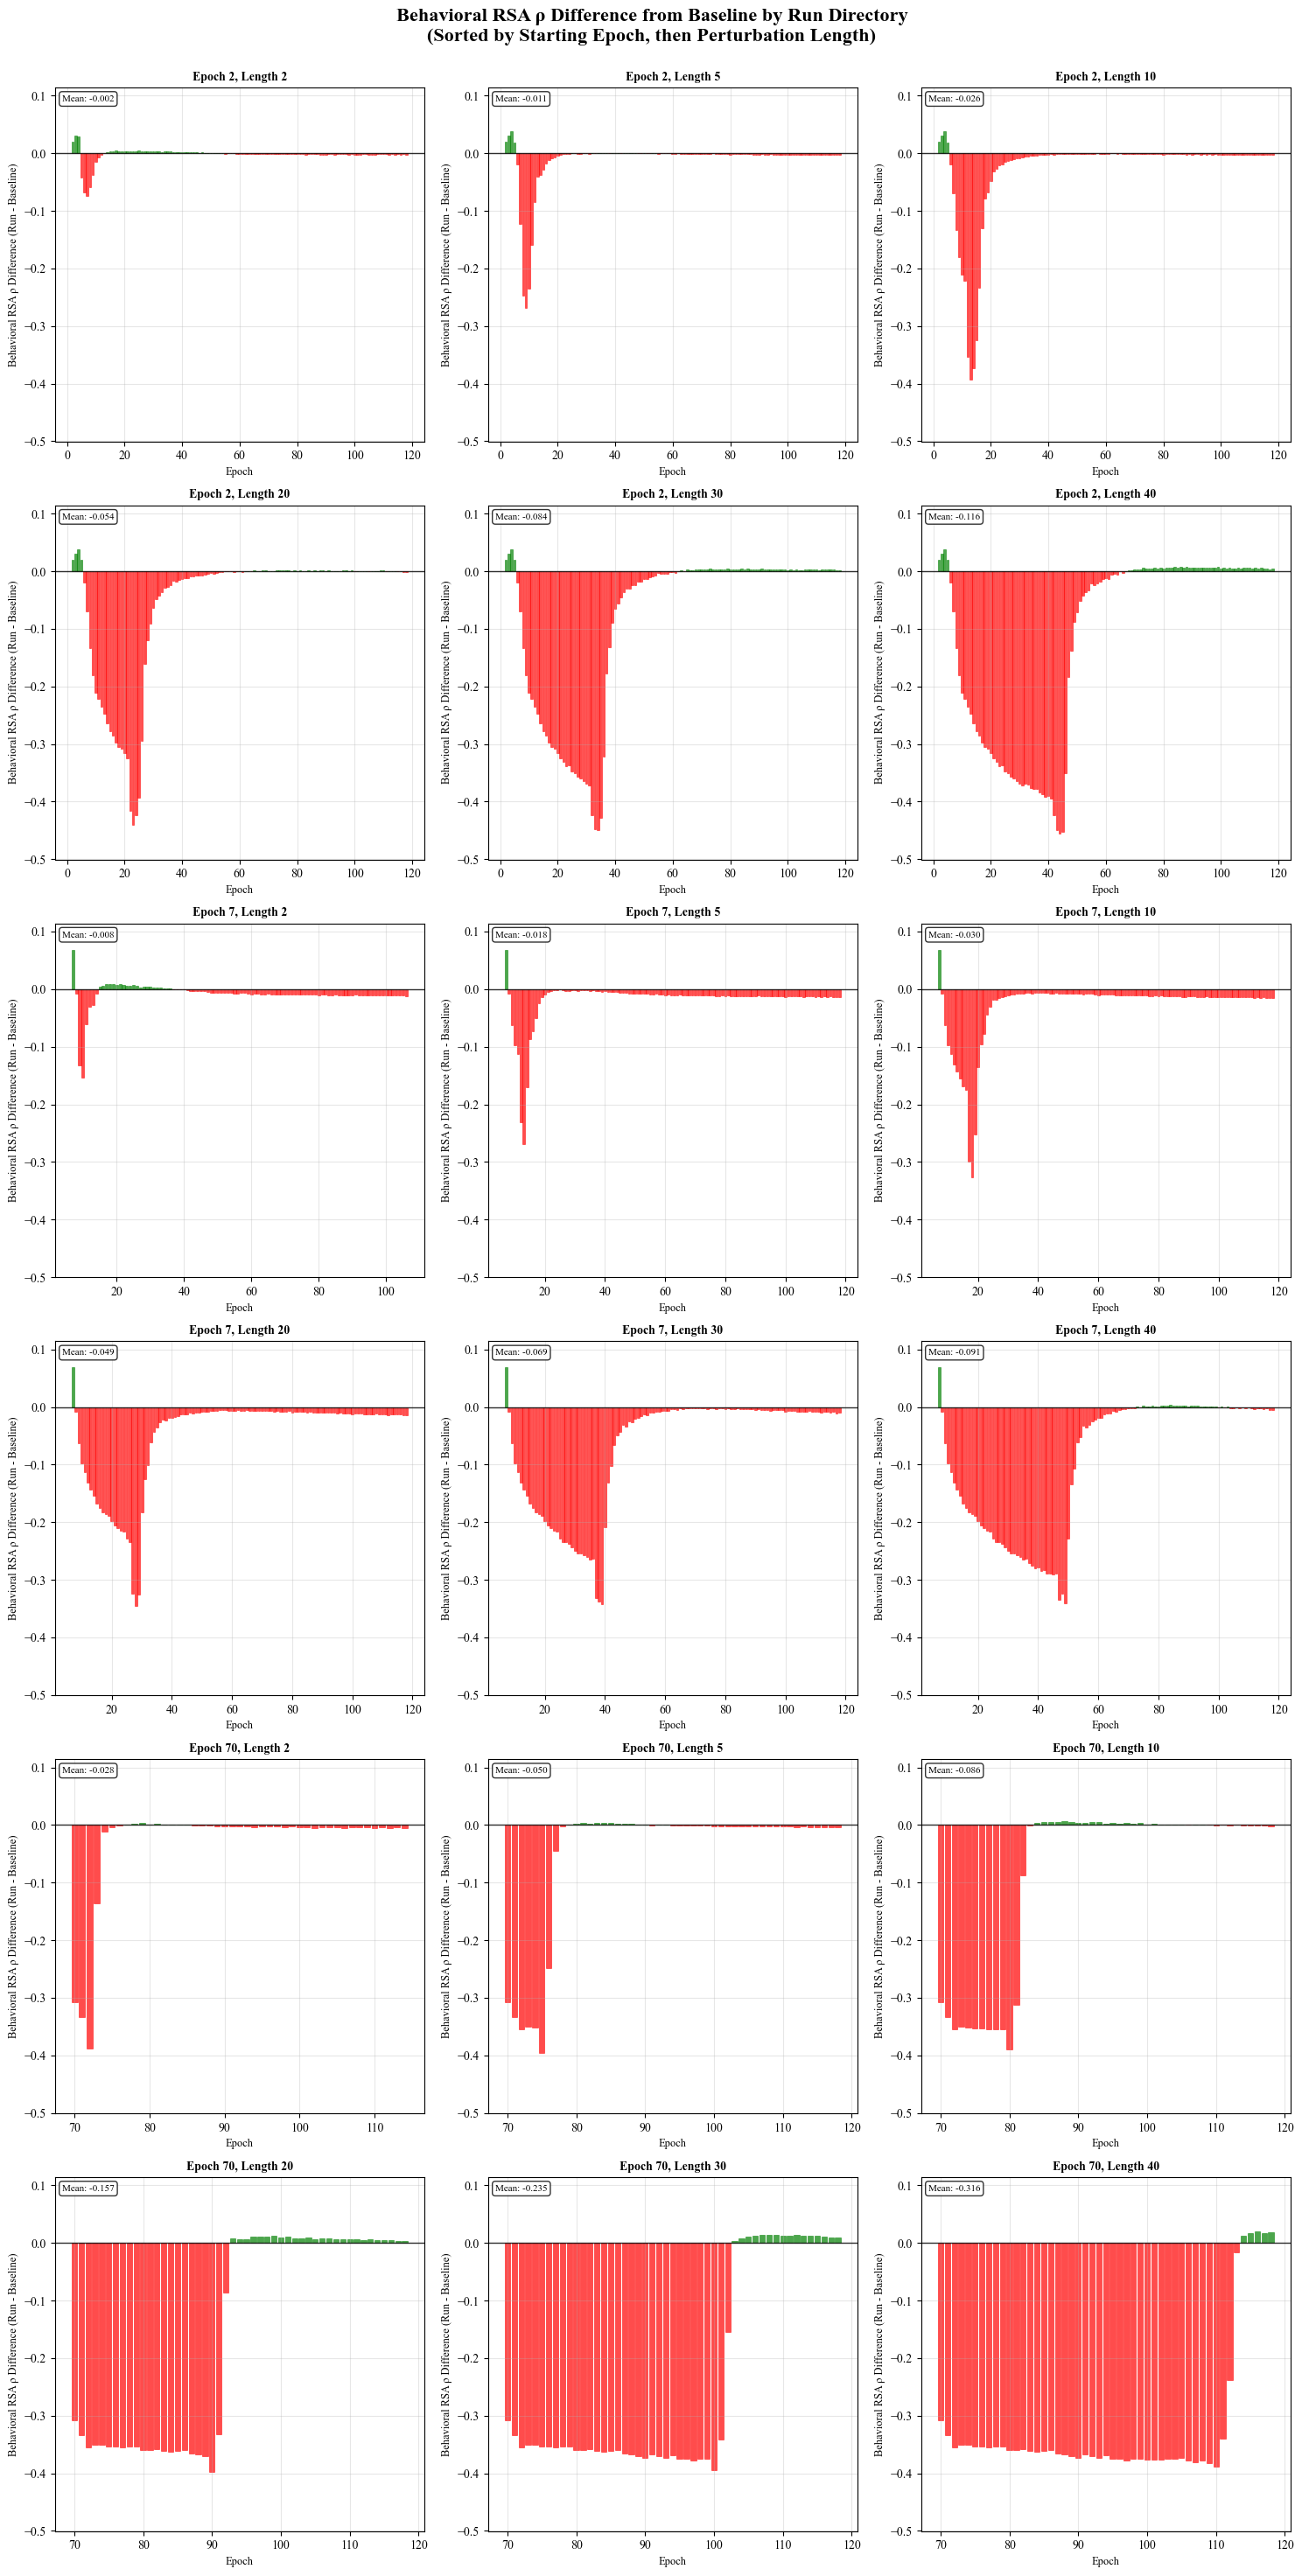


Summary:
Number of run_dir groups: 18
Total data points: 1777
Baseline data points: 118
Global y-axis range: [-0.5005, 0.1143]

Run order (sorted by start epoch, then length):
   1. Epoch 2, Length 2 (random_target_e2_l2)
   2. Epoch 2, Length 5 (random_target_e2_l5)
   3. Epoch 2, Length 10 (random_target_e2_l10)
   4. Epoch 2, Length 20 (random_target_e2_l20)
   5. Epoch 2, Length 30 (random_target_e2_l30)
   6. Epoch 2, Length 40 (random_target_e2_l40)
   7. Epoch 7, Length 2 (random_target_e7_l2)
   8. Epoch 7, Length 5 (random_target_e7_l5)
   9. Epoch 7, Length 10 (random_target_e7_l10)
  10. Epoch 7, Length 20 (random_target_e7_l20)
  11. Epoch 7, Length 30 (random_target_e7_l30)
  12. Epoch 7, Length 40 (random_target_e7_l40)
  13. Epoch 70, Length 2 (random_target_e70_l2)
  14. Epoch 70, Length 5 (random_target_e70_l5)
  15. Epoch 70, Length 10 (random_target_e70_l10)
  16. Epoch 70, Length 20 (random_target_e70_l20)
  17. Epoch 70, Length 30 (random_target_e70_l30)
  18. Epo

In [20]:
# Plot difference from baseline behavioral_rsa_rho for each run_dir group as separate subplots with bar plots
# Sorted by starting epoch, then by perturbation length

# First, let's check if we have the baseline data and all_perturb_length_data
if 'baseline_df' in locals() and baseline_df is not None and 'all_perturb_length_data' in locals() and not all_perturb_length_data.empty:
    
    # Get unique run_dir values
    unique_run_dirs = all_perturb_length_data['run_dir'].unique()
    
    # Parse run names to extract epoch and length for sorting
    def parse_run_name(run_name):
        """Parse run name like 'random_target_e2_l2' to extract epoch and length"""
        try:
            # Extract epoch and length from run name
            parts = run_name.split('_')
            epoch_part = None
            length_part = None
            
            for part in parts:
                if part.startswith('e') and part[1:].isdigit():
                    epoch_part = int(part[1:])
                elif part.startswith('l') and part[1:].isdigit():
                    length_part = int(part[1:])
            
            return epoch_part, length_part
        except:
            return None, None
    
    # Create sorting data for each run
    run_data_for_sorting = []
    for run_dir in unique_run_dirs:
        start_epoch, length = parse_run_name(run_dir)
        if start_epoch is not None and length is not None:
            run_data_for_sorting.append({
                'run_dir': run_dir,
                'start_epoch': start_epoch,
                'length': length
            })
    
    # Sort by start_epoch first, then by length
    run_data_for_sorting.sort(key=lambda x: (x['start_epoch'], x['length']))
    
    # Extract sorted run_dirs
    sorted_run_dirs = [item['run_dir'] for item in run_data_for_sorting]
    
    # Calculate number of rows and columns for subplots
    n_runs = len(sorted_run_dirs)
    n_cols = 3  # 3 columns
    n_rows = (n_runs + n_cols - 1) // n_cols  # Ceiling division
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Flatten axes array for easier indexing
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.flatten()
    
    # First pass: collect all differences to determine global y-axis limits
    all_differences_global = []
    for run_dir in sorted_run_dirs:
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            behavioral_rsa_rho = row['behavioral_rsa_rho']
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            if len(baseline_at_epoch) > 0:
                baseline_behavioral_rsa_rho = baseline_at_epoch['behavioral_rsa_rho'].iloc[0]
                difference = behavioral_rsa_rho - baseline_behavioral_rsa_rho  # Run - Baseline
                all_differences_global.append(difference)
    
    # Set global y-axis limits
    if all_differences_global:
        global_min = min(all_differences_global)
        global_max = max(all_differences_global)
        padding = max(abs(global_min), abs(global_max)) * 0.1
        global_ylim = (global_min - padding, global_max + padding)
    else:
        global_ylim = (-0.01, 0.01)
    
    # Process each run_dir in sorted order
    for i, run_dir in enumerate(sorted_run_dirs):
        ax = axes_flat[i]
        
        # Filter data for this run_dir
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir].copy()
        
        # Sort by epoch to ensure proper ordering
        run_data = run_data.sort_values('epoch')
        
        # Calculate difference from baseline behavioral_rsa_rho for each epoch
        differences = []
        epochs = []
        
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            behavioral_rsa_rho = row['behavioral_rsa_rho']
            
            # Find corresponding baseline behavioral_rsa_rho for this epoch
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            
            if len(baseline_at_epoch) > 0:
                baseline_behavioral_rsa_rho = baseline_at_epoch['behavioral_rsa_rho'].iloc[0]
                difference = behavioral_rsa_rho - baseline_behavioral_rsa_rho  # Run - Baseline
                differences.append(difference)
                epochs.append(epoch)
        
        # Create bar plot
        if differences:  # Only plot if we have data
            bars = ax.bar(epochs, differences, 
                         color='steelblue', 
                         alpha=0.7,
                         edgecolor='navy',
                         linewidth=0.5)
            
            # Color bars based on whether they're positive or negative
            for j, bar in enumerate(bars):
                if differences[j] > 0:
                    bar.set_color('green')  # Better behavioral alignment than baseline
                    bar.set_alpha(0.7)
                else:
                    bar.set_color('red')  # Worse behavioral alignment than baseline
                    bar.set_alpha(0.7)
            
            # Add horizontal line at y=0 to show baseline
            ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
            
            # Get epoch and length for title
            start_epoch, length = parse_run_name(run_dir)
            title = f'Epoch {start_epoch}, Length {length}' if start_epoch is not None and length is not None else run_dir
            
            # Customize the subplot
            ax.set_title(title, fontsize=10, fontweight='bold')
            ax.set_xlabel('Epoch', fontsize=9)
            ax.set_ylabel('Behavioral RSA ρ Difference (Run - Baseline)', fontsize=9)
            ax.grid(True, alpha=0.3)
            
            # Set all subplots to use the same y-axis limits for comparison
            ax.set_ylim(global_ylim)
            
            # Add text annotation showing summary stats
            mean_diff = np.mean(differences)
            ax.text(0.02, 0.98, f'Mean: {mean_diff:.3f}', 
                   transform=ax.transAxes, 
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   fontsize=8)
    
    # Hide unused subplots
    for i in range(n_runs, len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    # Add overall title
    fig.suptitle('Behavioral RSA ρ Difference from Baseline by Run Directory\n(Sorted by Starting Epoch, then Perturbation Length)', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    
    # Show the plot
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary:")
    print(f"Number of run_dir groups: {len(sorted_run_dirs)}")
    print(f"Total data points: {len(all_perturb_length_data)}")
    print(f"Baseline data points: {len(baseline_df)}")
    print(f"Global y-axis range: [{global_ylim[0]:.4f}, {global_ylim[1]:.4f}]")
    
    # Print the sorted order for verification
    print("\nRun order (sorted by start epoch, then length):")
    for i, item in enumerate(run_data_for_sorting):
        print(f"  {i+1:2d}. Epoch {item['start_epoch']}, Length {item['length']} ({item['run_dir']})")
    
    # Calculate overall statistics
    all_differences = []
    for run_dir in sorted_run_dirs:
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            behavioral_rsa_rho = row['behavioral_rsa_rho']
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            if len(baseline_at_epoch) > 0:
                baseline_behavioral_rsa_rho = baseline_at_epoch['behavioral_rsa_rho'].iloc[0]
                difference = behavioral_rsa_rho - baseline_behavioral_rsa_rho  # Run - Baseline
                all_differences.append(difference)
    
    if all_differences:
        print(f"\nOverall Statistics:")
        print(f"Mean difference: {np.mean(all_differences):.4f}")
        print(f"Std difference: {np.std(all_differences):.4f}")
        print(f"Min difference: {np.min(all_differences):.4f}")
        print(f"Max difference: {np.max(all_differences):.4f}")
        
        # Count positive vs negative differences
        positive_diffs = sum(1 for d in all_differences if d > 0)
        negative_diffs = sum(1 for d in all_differences if d < 0)
        print(f"Positive differences (better behavioral alignment): {positive_diffs}")
        print(f"Negative differences (worse behavioral alignment): {negative_diffs}")
        
        # Print per-run statistics
        print(f"\nPer-run statistics:")
        for item in run_data_for_sorting:
            run_dir = item['run_dir']
            run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
            run_differences = []
            for _, row in run_data.iterrows():
                epoch = row['epoch']
                behavioral_rsa_rho = row['behavioral_rsa_rho']
                baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
                if len(baseline_at_epoch) > 0:
                    baseline_behavioral_rsa_rho = baseline_at_epoch['behavioral_rsa_rho'].iloc[0]
                    difference = behavioral_rsa_rho - baseline_behavioral_rsa_rho  # Run - Baseline
                    run_differences.append(difference)
            
            if run_differences:
                mean_diff = np.mean(run_differences)
                print(f"  Epoch {item['start_epoch']}, Length {item['length']}: Mean diff = {mean_diff:.4f}, Range = [{np.min(run_differences):.4f}, {np.max(run_differences):.4f}]")

else:
    print("Error: Missing baseline data or all_perturb_length_data")
    if 'baseline_df' not in locals():
        print("  - baseline_df not found")
    elif baseline_df is None:
        print("  - baseline_df is None")
    if 'all_perturb_length_data' not in locals():
        print("  - all_perturb_length_data not found")
    elif all_perturb_length_data.empty:
        print("  - all_perturb_length_data is empty")
